# **Anàlisi Estadístic**

L'objectiu d'aquest codi es la realització d'un anàlisis bioestadístic per tal de trobar patrons diferencials i relacions entre regions mitjançant:



*   Anàlisi de correlacions
*   Diferencia de volums (t-test)
*   Regressió OLS Lineal
*   Anàlisi estratificat - lineal per trams d'edat
*   Regressió OLS Polinòmica quadràtica
*   Regressió OLS Polinòmica cúbica
*   Splines cúbics




## Càrrega de dades

### **PAS1: importar llibreries**

In [1]:
# numpy i Pandas per manipular dades
import numpy as np
import pandas as pd
# per visualitzar dades
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# llibreries estadística
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
# enllaça a drive
from google.colab import drive

### **PAS2: enllaçar amb drive**

In [2]:
#paths relatius a l'arxiu ipynb
import glob
# recuperar ruta de l'scritp
script_name = '4_Analysis.ipynb'
drive.mount(os.getcwd() + '/drive')
script_path = glob.glob(os.getcwd() + '/**/' + script_name, recursive = True)
print(script_path)
head_tail = os.path.split(script_path[0])
# guardem carpeta de treball
work_path = head_tail[0];

Mounted at /content/drive
['/content/drive/MyDrive/TFM/Finals/4_Analysis.ipynb']


### **PAS3: llegir arxius**

In [3]:
#llegir CSV
v_path = work_path + '/CSV/harmonized_data.csv'
v_ICV_path = work_path + '/CSV/harmonized_ICV_data.csv'

# Lectura arxiu
vol = pd.read_csv(v_path, encoding='latin-1')
vol_ICV = pd.read_csv(v_ICV_path, encoding='latin-1')

In [4]:
# comprobar que s'ha llegit bé
vol_ICV.head()

Unnamed: 0  total intracranial  left cerebral white matter  \
0           0        1.596565e+06                   14.828884   
1           1        1.475760e+06                   14.385238   
2           2        1.475055e+06                   13.444473   
3           3        1.838163e+06                   14.898534   
4           4        1.838187e+06                   14.217039   

   right cerebral white matter           SITE  SUB_ID DX_GROUP  AGE_AT_SCAN  \
0                    14.785216  ABIDEII-BNI_1   29028      TEA         21.0   
1                    14.403042  ABIDEII-BNI_1   29029      TEA         20.0   
2                    13.514513  ABIDEII-BNI_1   29030      TEA         18.0   
3                    14.945644  ABIDEII-BNI_1   29031      TEA         21.0   
4                    14.375942  ABIDEII-BNI_1   29037      TEA         19.0   

   SEX    FIQ  
0    1   94.0  
1    1   97.0  
2    1  111.0  
3    1   97.0  
4    1  139.0

In [5]:
# path imatges
img_base = work_path + '/Imatges/'
if not os.path.exists(img_base):
    os.makedirs(img_base)
# path imatges
img_Ttest_path = work_path + '/Imatges/Ttest/'
if not os.path.exists(img_Ttest_path):
    os.makedirs(img_Ttest_path)
img_OLS_path = work_path + '/Imatges/OLS/'
if not os.path.exists(img_OLS_path):
    os.makedirs(img_OLS_path)

### PAS4: Preparació Dades

Eliminar columnes unnamed

In [6]:
# data frame
vol_ICV.drop(vol_ICV.columns[vol_ICV.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
vol_ICV.columns

Index(['total intracranial', 'left cerebral white matter',
       'right cerebral white matter', 'SITE', 'SUB_ID', 'DX_GROUP',
       'AGE_AT_SCAN', 'SEX', 'FIQ'],
      dtype='object')

In [7]:
# data frame
vol.drop(vol.columns[vol.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
vol.columns

Index(['left cerebral white matter', 'left cerebral cortex',
       'left lateral ventricle', 'left inferior lateral ventricle',
       'left cerebellum white matter', 'left cerebellum cortex',
       'left thalamus', 'left caudate', 'left putamen', 'left pallidum',
       '3rd ventricle', '4th ventricle', 'brain-stem', 'left hippocampus',
       'left amygdala', 'csf', 'left accumbens area', 'left ventral DC',
       'right cerebral white matter', 'right cerebral cortex',
       'right lateral ventricle', 'right inferior lateral ventricle',
       'right cerebellum white matter', 'right cerebellum cortex',
       'right thalamus', 'right caudate', 'right putamen', 'right pallidum',
       'right hippocampus', 'right amygdala', 'right accumbens area',
       'right ventral DC', 'SITE', 'SUB_ID', 'DX_GROUP', 'AGE_AT_SCAN', 'SEX',
       'FIQ'],
      dtype='object')

# **Anàlisi de correlacions**

Es comproba si hi ha alguna regió que estigui fortament relacionada amb el grup (TEA/Control)

In [8]:
df_corr = vol.copy(True)
df_corr.drop(['SITE','SUB_ID'],axis=1,inplace=True)
# convertir grup en numèric
df_corr['DX_GROUP'] = df_corr['DX_GROUP'].map({"TEA": 1,"CONTROL":2})
corr_global = df_corr.corr()

Global:

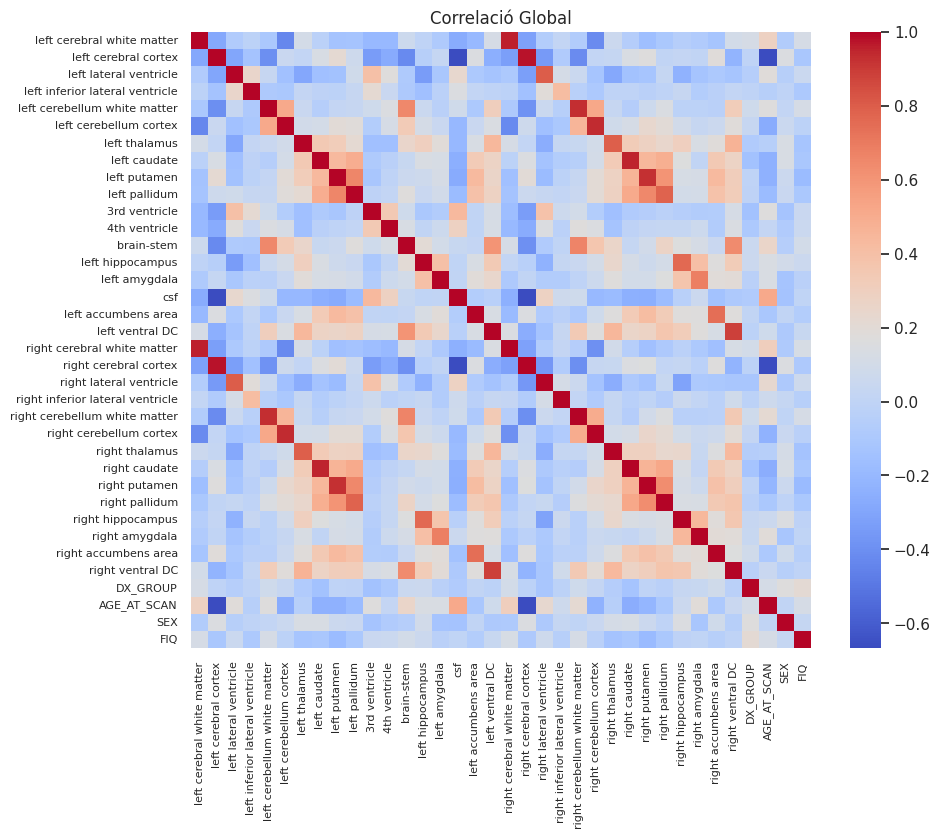

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_global, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlació Global')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.savefig(img_Ttest_path + 'corr_global.png')
plt.show()

Tea VS Control

In [10]:
corr_TEA = df_corr[df_corr['DX_GROUP'] == 1].drop(['DX_GROUP'],axis=1).corr()
corr_CONTROL = df_corr[df_corr['DX_GROUP'] == 2].drop(['DX_GROUP'],axis=1).corr()

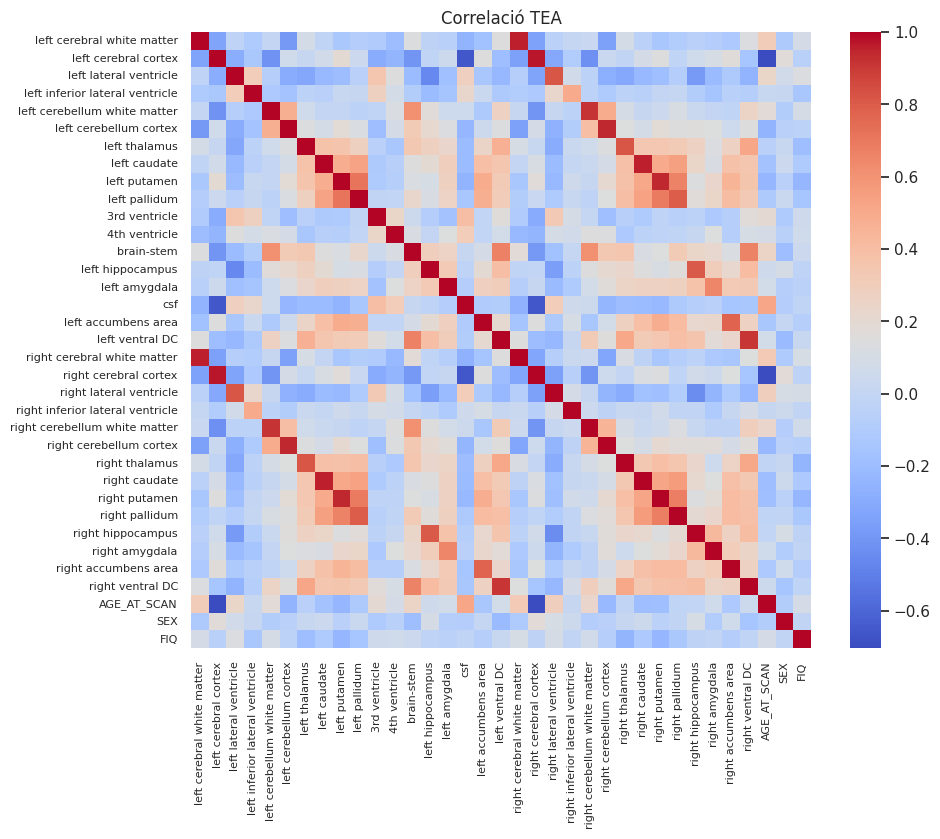

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_TEA, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlació TEA')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.savefig(img_Ttest_path + 'corr_TEA.png')
plt.show()

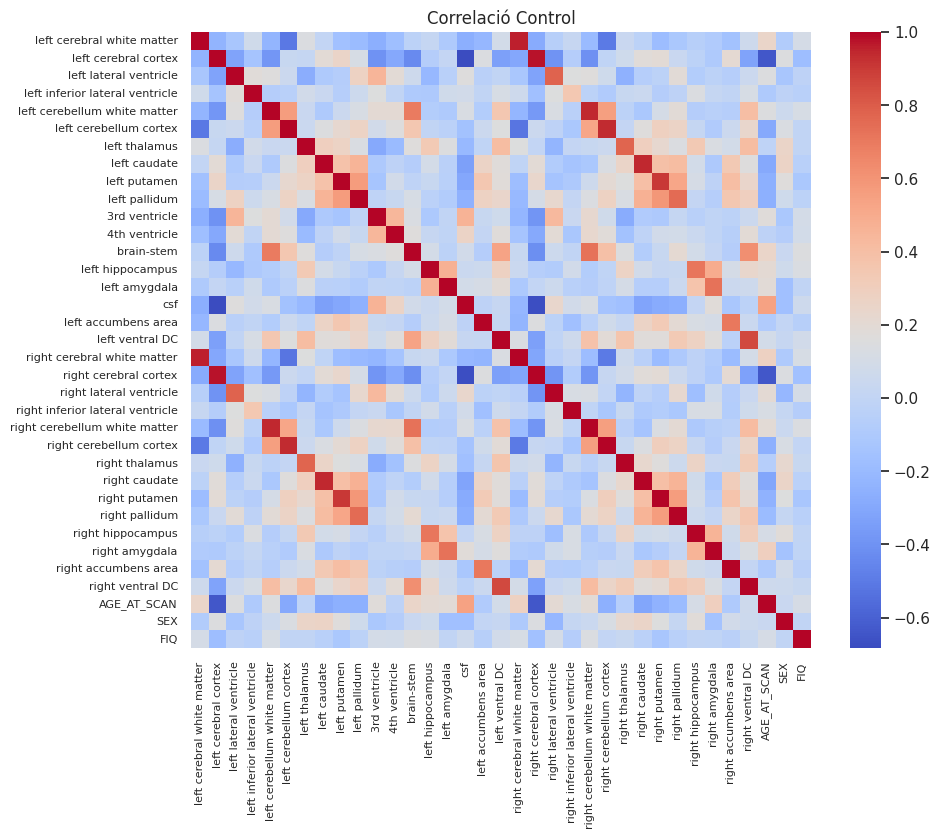

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_CONTROL, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlació Control')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.savefig(img_Ttest_path + 'corr_Ctrl.png')
plt.show()

Diferència:

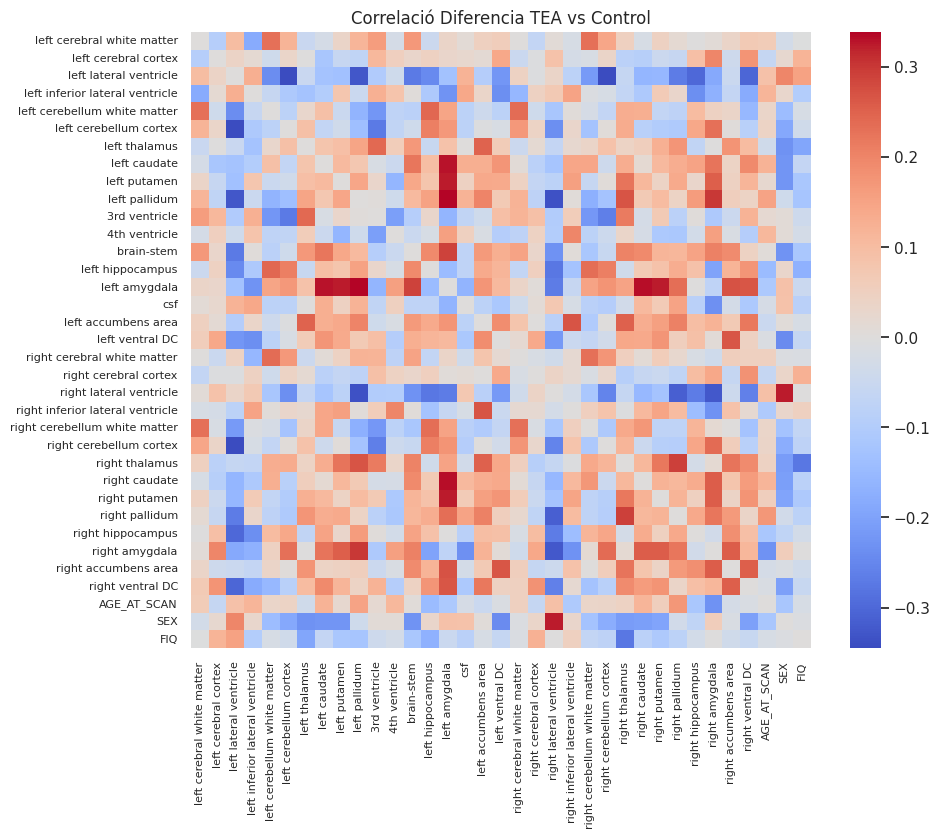

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_TEA - corr_CONTROL, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlació Diferencia TEA vs Control')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.savefig(img_Ttest_path + 'corr_TEA_Ctrl.png')
plt.show()

Per mostrar només aquelles amb una diferencia de moderada a forta

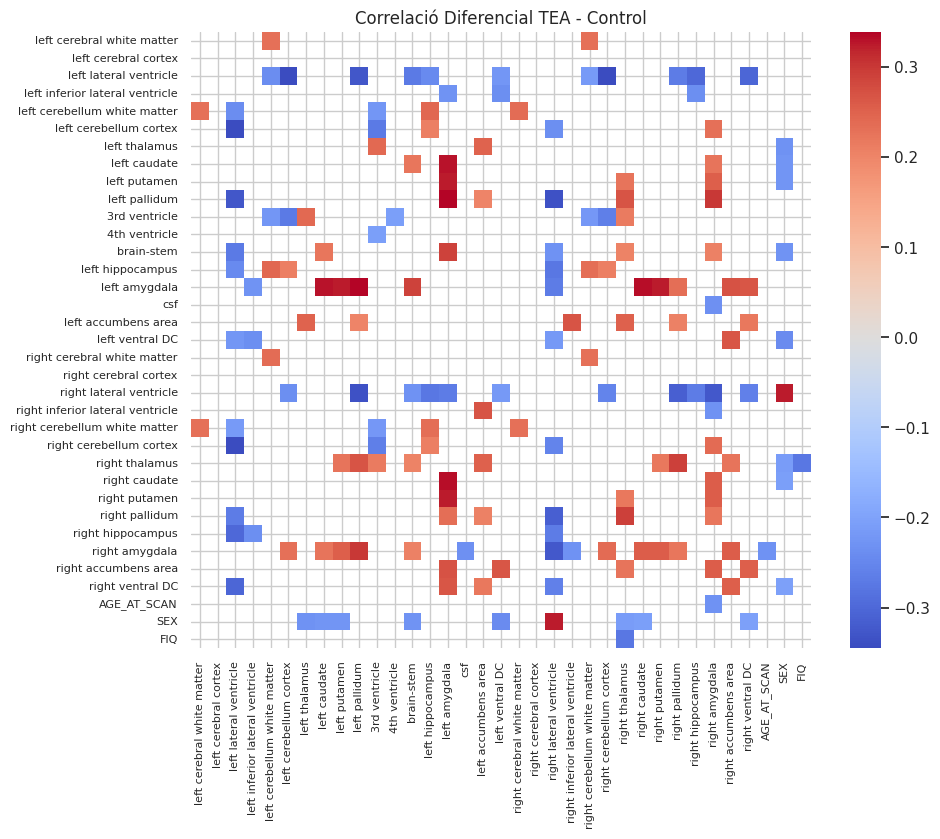

In [14]:
corr_Diff = corr_TEA - corr_CONTROL
# llindar
threshold = 0.2

# màscara: si la diferencia és menor al threshold amaga, si és major o igual mostra
mascara = np.abs(corr_Diff) < threshold
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_Diff, annot=False, cmap='coolwarm', fmt=".2f", mask=mascara)
plt.title('Correlació Diferencial TEA - Control')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.savefig(img_Ttest_path + 'corr_TEA_Ctrl_sign.png')
plt.show()


# **T-test**

## Total Intracranial

/tmp/ipython-input-2623361586.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


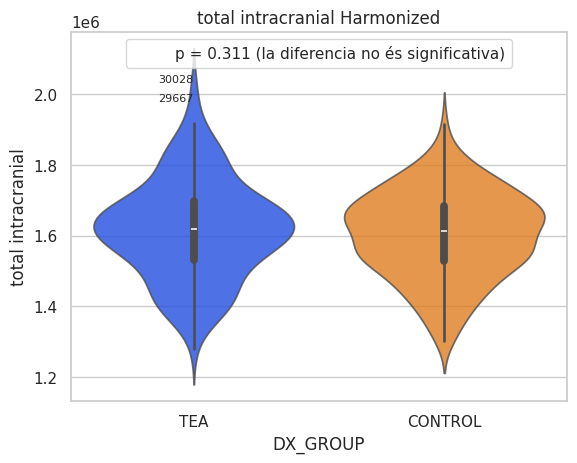

Regió  pValor  Estadístic t   Mitjana TEA  Mitjana Control  \
0  total intracranial  0.3111      1.014553  1.617956e+06     1.602936e+06   

     CV TEA  CV Control  
0  0.086509    0.076333

In [15]:
# comprobar normalitat de les dades
stat_TEA, p_TEA = stats.shapiro(vol_ICV[vol_ICV['DX_GROUP'] == 'TEA']['total intracranial'])
stat_CTRL, p_VTRL = stats.shapiro(vol_ICV[vol_ICV['DX_GROUP'] == 'CONTROL']['total intracranial'])
normal = False
if p_TEA > 0.05 and p_VTRL > 0.05:
    normal = True

#t-test
t_stats, p_stats = stats.ttest_ind(vol_ICV[vol_ICV['DX_GROUP'] == 'TEA']['total intracranial'], vol_ICV[vol_ICV['DX_GROUP'] == 'CONTROL']['total intracranial'], equal_var=normal)
text = f'p = {p_stats:.3f} (la diferencia no és significativa)'
if p_stats < 0.05:
    text = f'p = {p_stats:.3f} (la diferencia és significativa)'

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió",  "pValor", "Estadístic t", "Mitjana TEA", "Mitjana Control", "CV TEA", "CV Control"])
# Guardar resultats clau
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        "Regió": ['total intracranial'],
        "pValor": [p_stats],
        "Estadístic t": [t_stats],
        "Mitjana TEA": [vol_ICV[vol_ICV['DX_GROUP'] == 'TEA']['total intracranial'].mean()],
        "Mitjana Control": [vol_ICV[vol_ICV['DX_GROUP'] == 'CONTROL']['total intracranial'].mean()],
        "CV TEA": [np.std(vol_ICV[vol_ICV['DX_GROUP'] == 'TEA']['total intracranial'],ddof=1)/
                        vol_ICV[vol_ICV['DX_GROUP'] == 'TEA']['total intracranial'].mean()],
        "CV Control": [np.std(vol_ICV[vol_ICV['DX_GROUP'] == 'CONTROL']['total intracranial'],ddof=1)/
                        vol_ICV[vol_ICV['DX_GROUP'] == 'CONTROL']['total intracranial'].mean()]
    })
], ignore_index=True)
# gràfic
sns.set_style("whitegrid")
sns.violinplot(x='DX_GROUP', y='total intracranial', data=vol_ICV,
                    palette='bright', hue='DX_GROUP', alpha=0.8)

# identificar outliers
for grup in vol_ICV['DX_GROUP'].unique():
    cat_df = vol_ICV[vol_ICV['DX_GROUP'] ==  grup]
    var = 'total intracranial'
    #print (var)

    q1 = cat_df[var].quantile(0.25)
    q3 = cat_df[var].quantile(0.75)
    iqr = q3-q1
    LL = q1 - 1.5 * iqr
    HL = q3 + 1.5 * iqr

    outliers = cat_df[(cat_df[var] < LL) | (cat_df[var] > HL)]

    # anotar outliers
    for _,row in outliers.iterrows():
        plt.text(x=list(vol_ICV['DX_GROUP'].unique()).index(grup), y=row[var], s=row['SUB_ID'], ha='right', va='bottom', fontsize=8)


plt.title('total intracranial Harmonized')
# mostrar si la diferència és significativa a la llegenda:
plt.plot([],[],marker=None,linestyle='',label=text)
plt.legend(loc='upper center')

#plt.savefig(img_Ttest_path + 'ttest_ICV_Grup.png')
plt.show()

display(results_df)

## Regions Cerebrals

In [16]:
vol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   left cerebral white matter        316 non-null    float64
 1   left cerebral cortex              316 non-null    float64
 2   left lateral ventricle            316 non-null    float64
 3   left inferior lateral ventricle   316 non-null    float64
 4   left cerebellum white matter      316 non-null    float64
 5   left cerebellum cortex            316 non-null    float64
 6   left thalamus                     316 non-null    float64
 7   left caudate                      316 non-null    float64
 8   left putamen                      316 non-null    float64
 9   left pallidum                     316 non-null    float64
 10  3rd ventricle                     316 non-null    float64
 11  4th ventricle                     316 non-null    float64
 12  brain-st

stat=-2.121, p=0.035


/tmp/ipython-input-1523818958.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


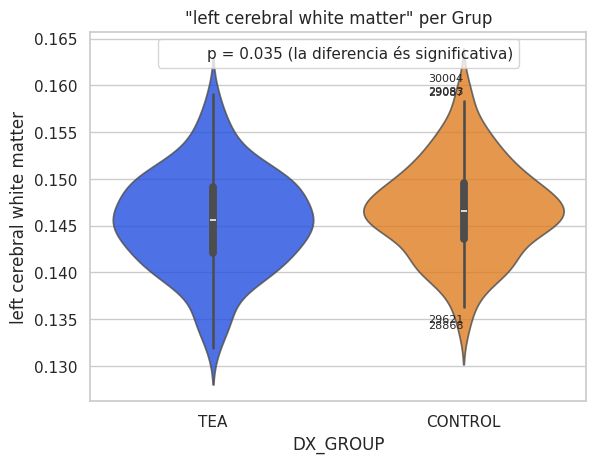

Com a mínim un dels dos grups no té una distribució normal
stat=0.119, p=0.905


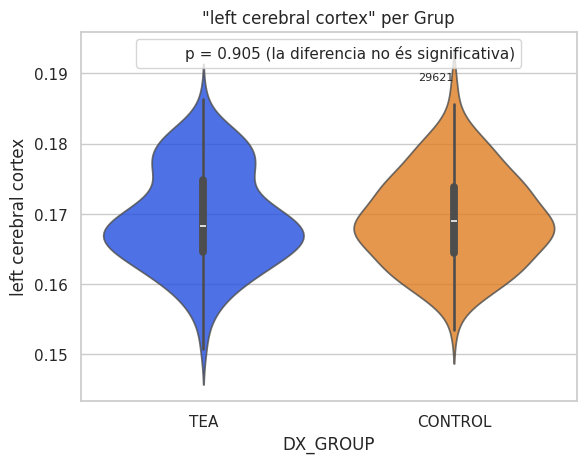

Com a mínim un dels dos grups no té una distribució normal
stat=0.911, p=0.363


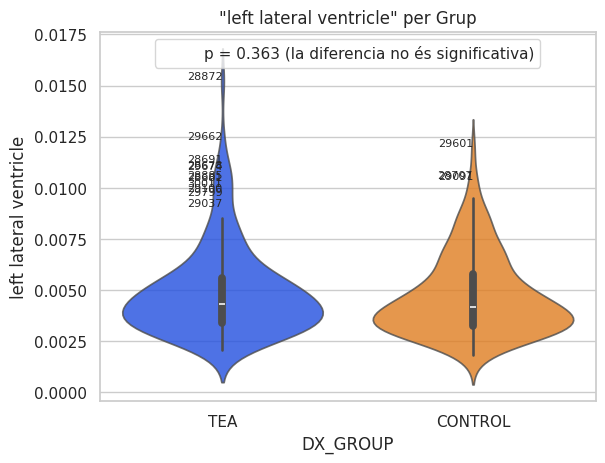

Com a mínim un dels dos grups no té una distribució normal
stat=0.045, p=0.964


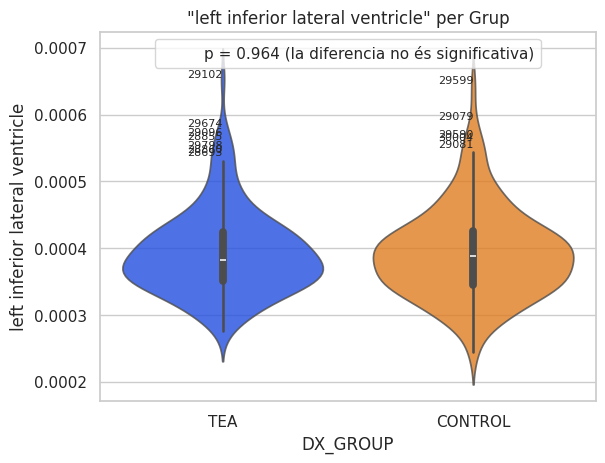

stat=-1.387, p=0.166


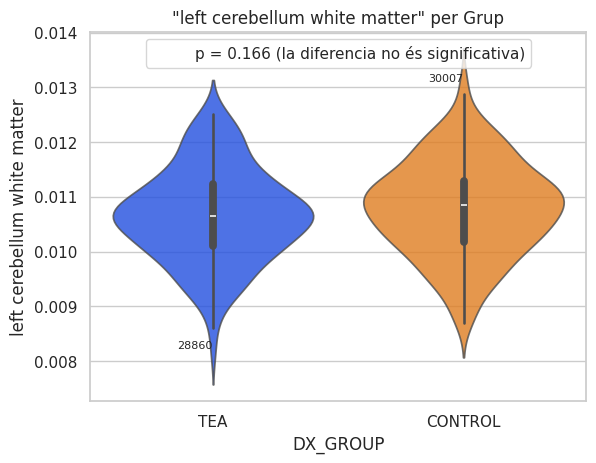

stat=-0.575, p=0.566


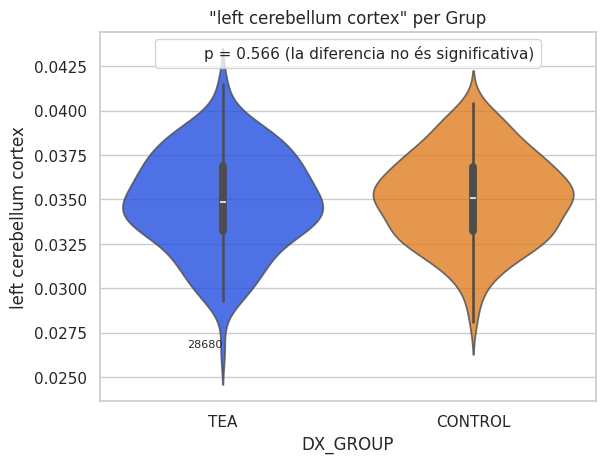

stat=1.400, p=0.162


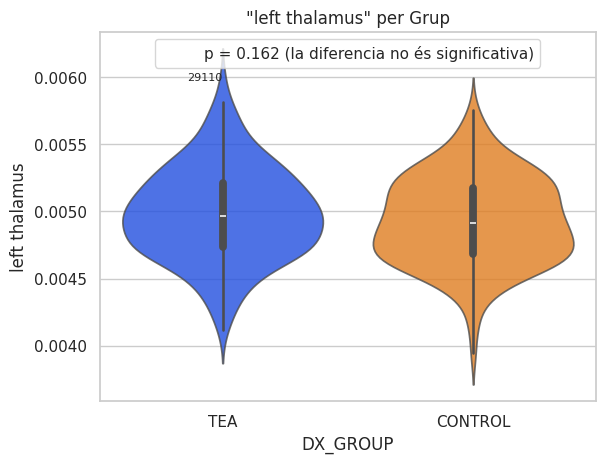

stat=2.492, p=0.013


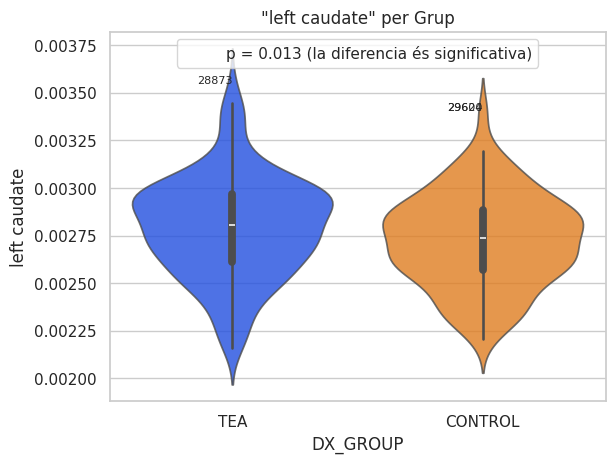

stat=0.144, p=0.885


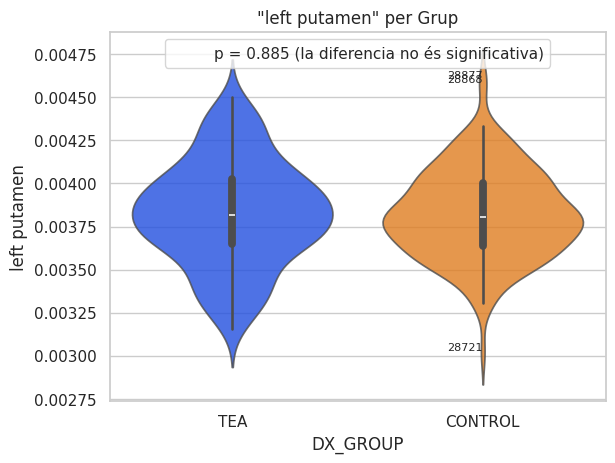

stat=0.236, p=0.814


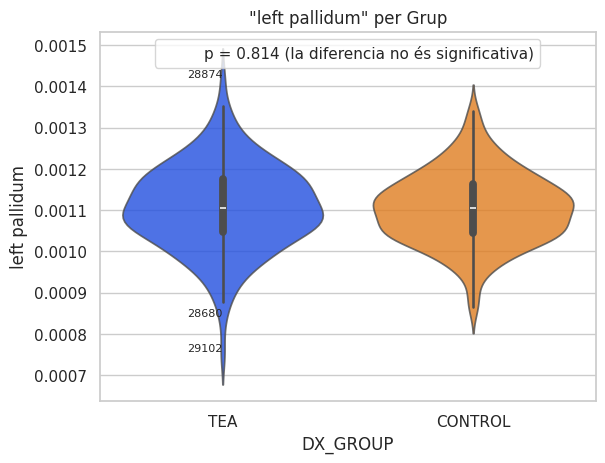

Com a mínim un dels dos grups no té una distribució normal
stat=2.524, p=0.012


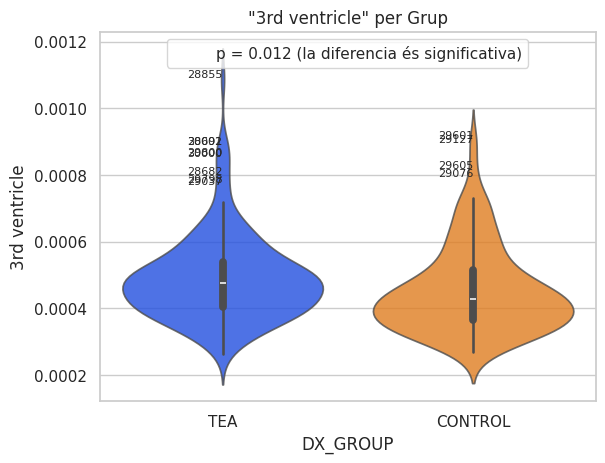

Com a mínim un dels dos grups no té una distribució normal
stat=1.743, p=0.082


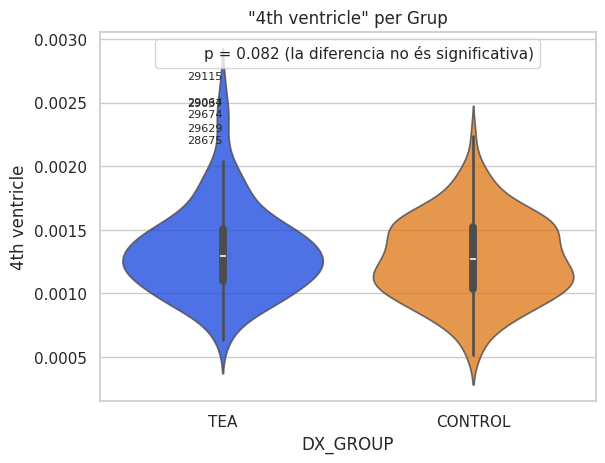

Com a mínim un dels dos grups no té una distribució normal
stat=-0.977, p=0.329


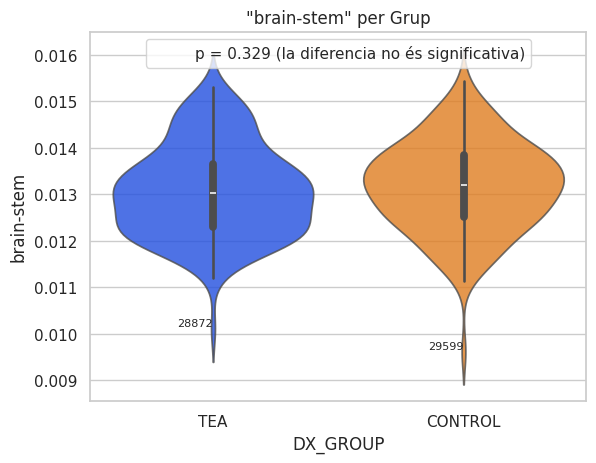

Com a mínim un dels dos grups no té una distribució normal
stat=-1.078, p=0.282


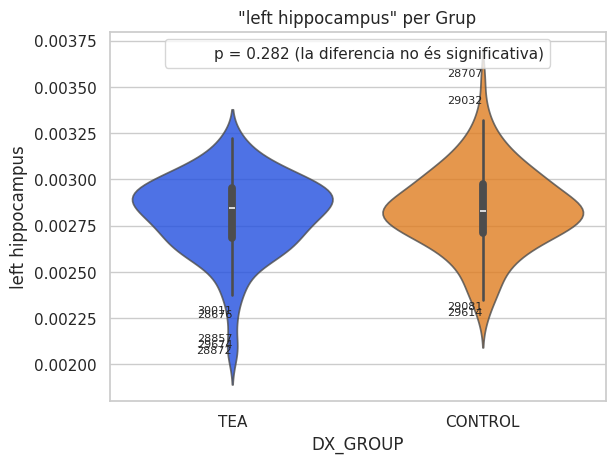

Com a mínim un dels dos grups no té una distribució normal
stat=0.619, p=0.536


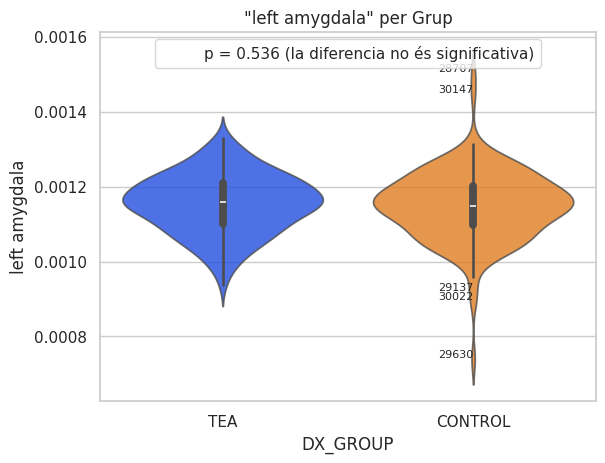

stat=1.344, p=0.180


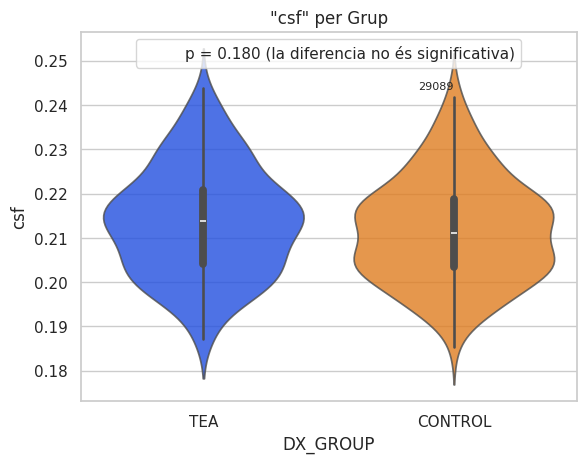

stat=-0.117, p=0.907


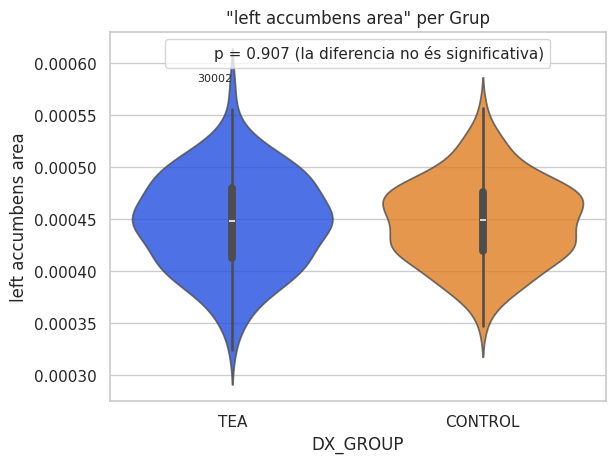

stat=0.290, p=0.772


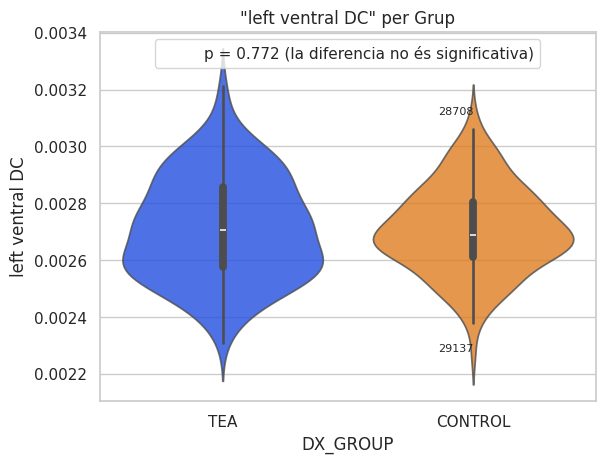

stat=-1.714, p=0.088


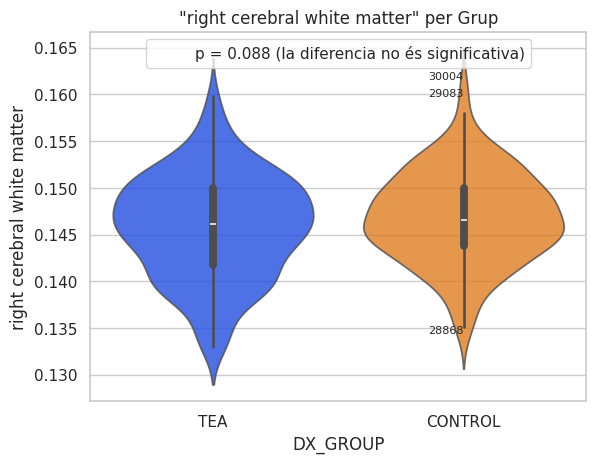

stat=0.368, p=0.713


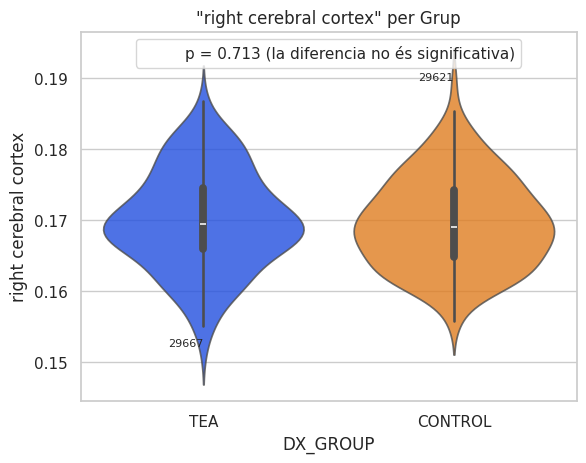

Com a mínim un dels dos grups no té una distribució normal
stat=2.087, p=0.038


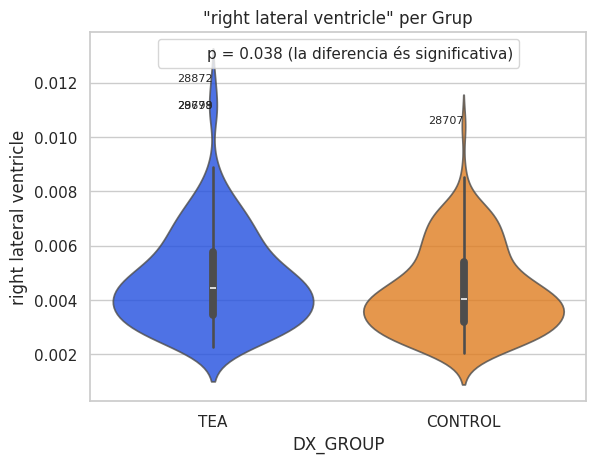

Com a mínim un dels dos grups no té una distribució normal
stat=0.288, p=0.774


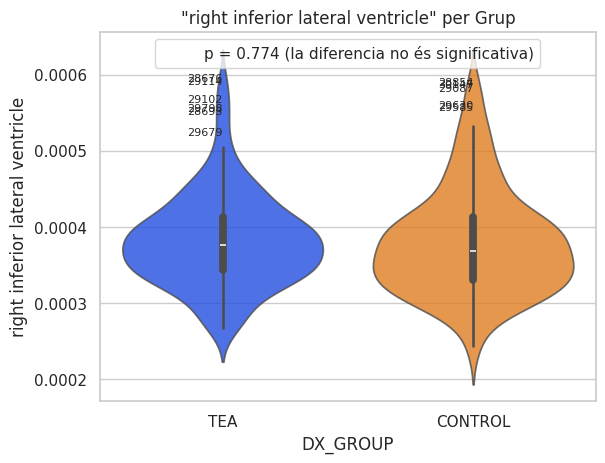

stat=-1.352, p=0.177


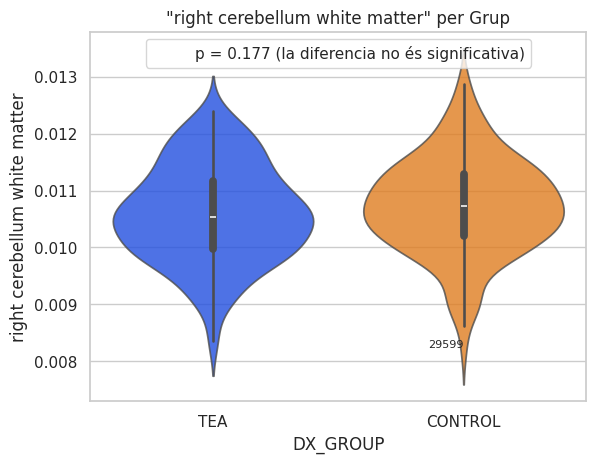

stat=-0.375, p=0.708


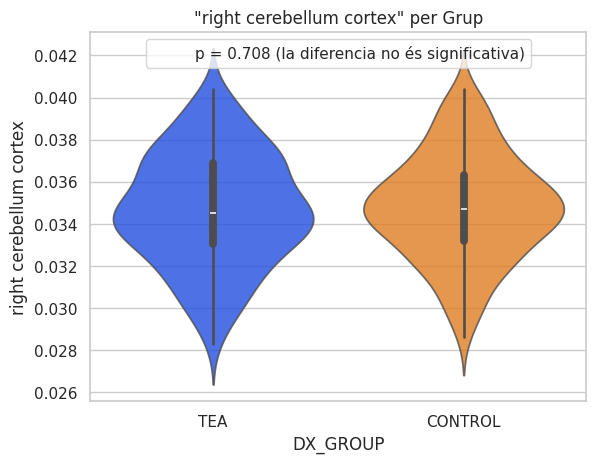

stat=0.975, p=0.330


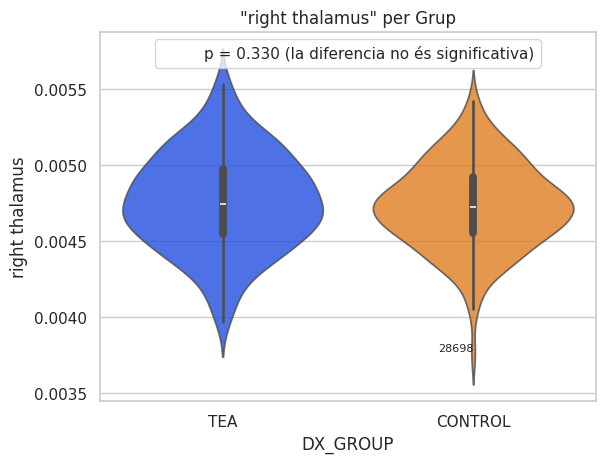

stat=2.367, p=0.019


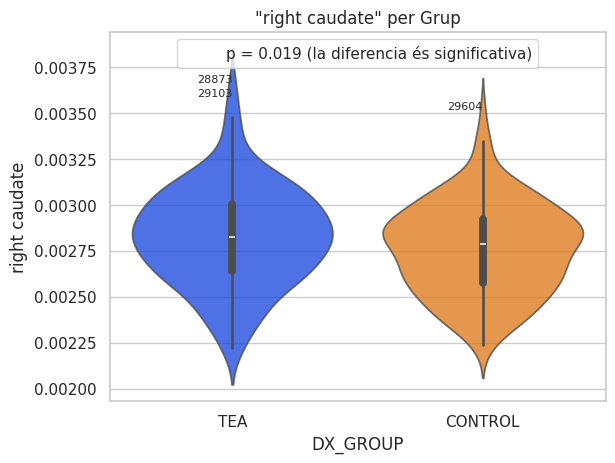

stat=0.063, p=0.950


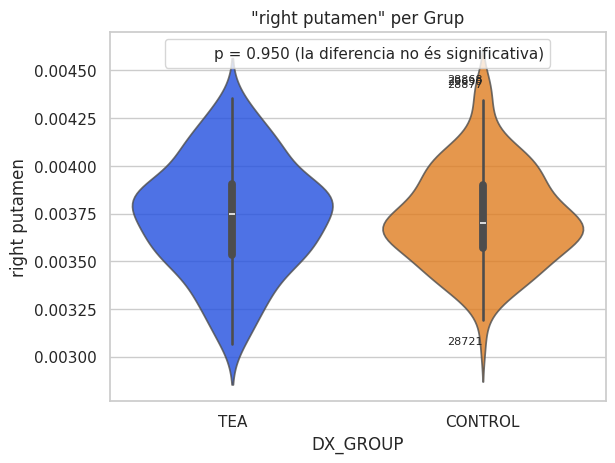

stat=0.519, p=0.604


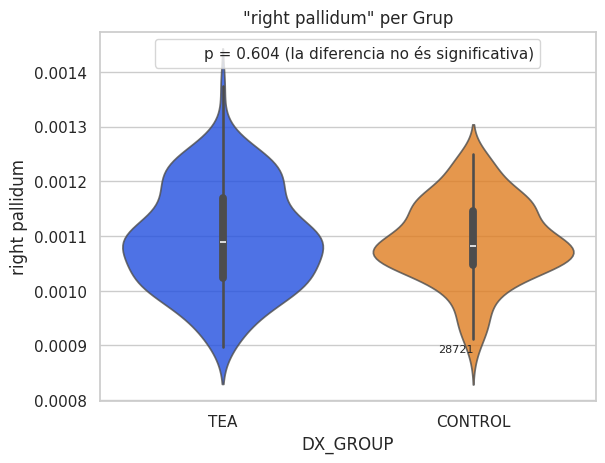

stat=-0.613, p=0.540


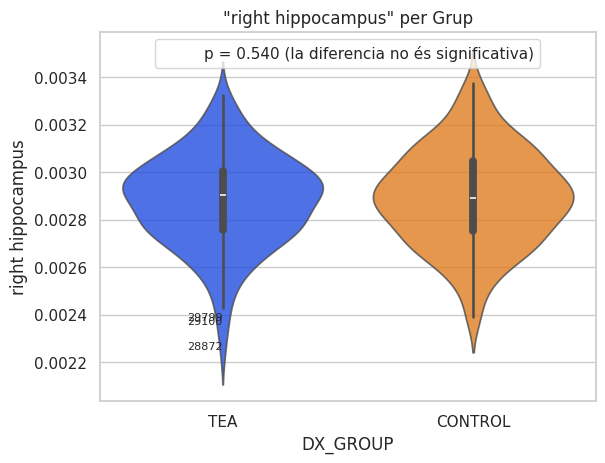

stat=-0.734, p=0.463


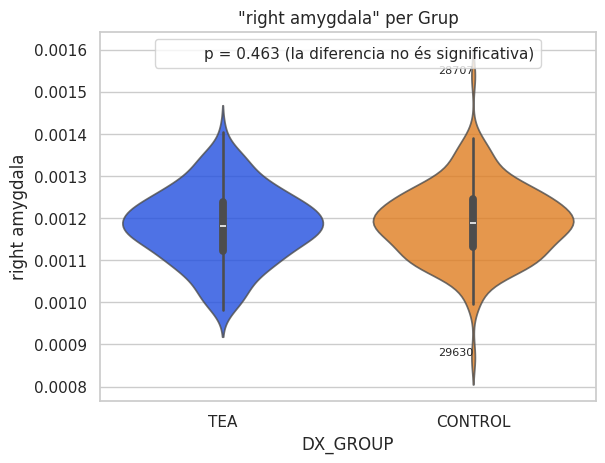

stat=-1.469, p=0.143


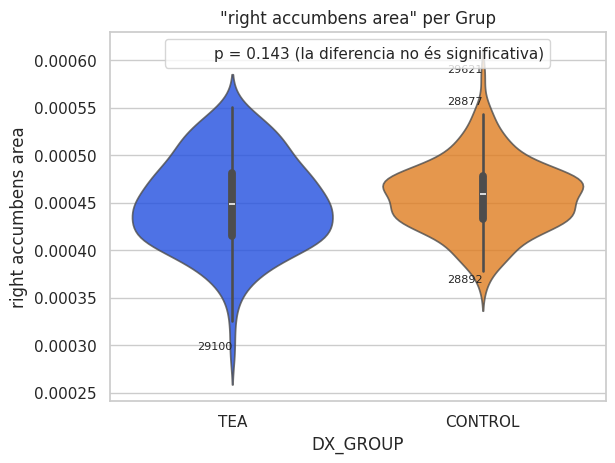

stat=0.543, p=0.588


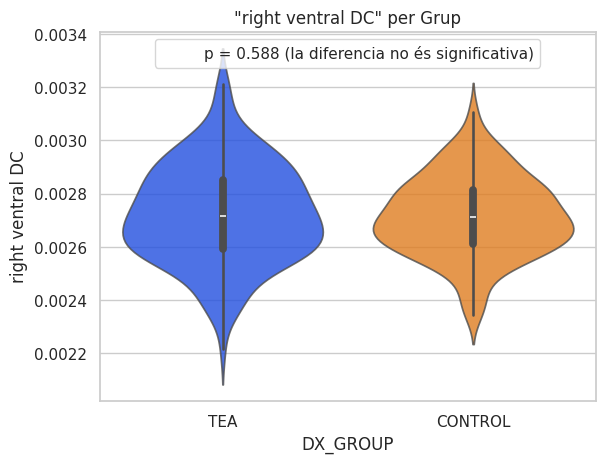

Regió    pValor  Estadístic t  Mitjana TEA  \
0         left cerebral white matter  0.034734     -2.120655     0.145463   
1               left cerebral cortex  0.905020      0.119419     0.169319   
2             left lateral ventricle  0.363056      0.910894     0.004930   
3    left inferior lateral ventricle  0.964027      0.045137     0.000393   
4       left cerebellum white matter  0.166390     -1.387117     0.010661   
5             left cerebellum cortex  0.565816     -0.574833     0.034880   
6                      left thalamus  0.162495      1.400018     0.004985   
7                       left caudate  0.013228      2.491736     0.002797   
8                       left putamen  0.885263      0.144418     0.003826   
9                      left pallidum  0.813707      0.235845     0.001107   
10                     3rd ventricle  0.012082      2.524415     0.000490   
11                     4th ventricle  0.082232      1.743491     0.001340   
12                        brain-stem  0.329439     -0.976762     0.013074   
13                  left hippocampus  0.282076     -1.077521     0.002808   
14                     left amygdala  0.536298      0.619126     0.001155   
15                               csf  0.180080      1.343501     0.213662   
16               left accumbens area  0.906739     -0.117247     0.000448   
17                   left ventral DC  0.772268      0.289659     0.002713   
18       right cerebral white matter  0.087575     -1.713676     0.145875   
19             right cerebral cortex  0.712877      0.368327     0.169974   
20           right lateral ventricle  0.037658      2.087476     0.004754   
21  right inferior lateral ventricle  0.773806      0.287653     0.000382   
22     right cerebellum white matter  0.177250     -1.352309     0.010597   
23           right cerebellum cortex  0.707742     -0.375231     0.034679   
24                    right thalamus  0.330211      0.975202     0.004764   
25                     right caudate  0.018529      2.367205     0.002830   
26                     right putamen  0.949789      0.063023     0.003734   
27                    right pallidum  0.604118      0.519012     0.001095   
28                 right hippocampus  0.540441     -0.612816     0.002881   
29                    right amygdala  0.463336     -0.734264     0.001182   
30              right accumbens area  0.142952     -1.468563     0.000450   
31                  right ventral DC  0.587640      0.542818     0.002726   

    Mitjana Control    CV TEA  CV Control  
0          0.146701  0.036509    0.034486  
1          0.169227  0.041165    0.039051  
2          0.004718  0.444599    0.414393  
3          0.000393  0.160545    0.170968  
4          0.010795  0.079629    0.080182  
5          0.035048  0.078290    0.070726  
6          0.004932  0.069181    0.065994  
7          0.002726  0.094967    0.089219  
8          0.003821  0.079099    0.066834  
9          0.001105  0.092960    0.077801  
10         0.000453  0.259366    0.283488  
11         0.001273  0.265493    0.253483  
12         0.013181  0.075237    0.073191  
13         0.002835  0.077111    0.077765  
14         0.001149  0.067830    0.080478  
15         0.211853  0.057219    0.055239  
16         0.000448  0.102999    0.090297  
17         0.002707  0.067024    0.056028  
18         0.146885  0.038090    0.033295  
19         0.169697  0.040760    0.038091  
20         0.004362  0.371633    0.358870  
21         0.000380  0.159199    0.182169  
22         0.010726  0.080048    0.079133  
23         0.034788  0.076940    0.072124  
24         0.004731  0.066759    0.058843  
25         0.002761  0.095508    0.089023  
26         0.003732  0.077675    0.068251  
27         0.001090  0.086014    0.068531  
28         0.002894  0.067273    0.069827  
29         0.001189  0.073172    0.074600  
30         0.000457  0.105940    0.081979  
31         0.002715  0.067794    0.055364

In [17]:
# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió",  "pValor", "Estadístic t", "Mitjana TEA", "Mitjana Control", "CV TEA", "CV Control"])
j = 0
for i in list(vol.iloc[:, :32].columns):
    #plt.figure(figsize = (15,7.5))
    ax = sns.violinplot(x='DX_GROUP', y=str(i), data=vol, palette='bright', hue='DX_GROUP', alpha=0.8)
    plt.title(f'"{i}" per Grup')

    #Shapiro-Wilk Tes per comprobar normalitat de les dades
    stat_TEA, p_TEA = stats.shapiro(vol[vol['DX_GROUP'] == 'TEA'][str(i)])
    stat_CTRL, p_VTRL = stats.shapiro(vol[vol['DX_GROUP'] == 'CONTROL'][str(i)])

    normal_dist = True
    if p_TEA < 0.05 or p_VTRL < 0.05:
        normal_dist = False
        print ("Com a mínim un dels dos grups no té una distribució normal")

    # t-test
    t_stats, p_stats = stats.ttest_ind(vol[vol['DX_GROUP'] == 'TEA'][str(i)], vol[vol['DX_GROUP'] == 'CONTROL'][str(i)], equal_var=normal_dist)
    print('stat=%.3f, p=%.3f' % (t_stats, p_stats))

    text = f'p = {p_stats:.3f} (la diferencia no és significativa)'
    if p_stats < 0.05:
        text = f'p = {p_stats:.3f} (la diferencia és significativa)'
    # mostrar si la diferència és significativa a la llegenda:
    plt.plot([],[],marker=None,linestyle='',label=text)

    # Guardar resultats clau
    results_df = pd.concat([
        results_df,
        pd.DataFrame({
            "Regió": [str(i)],
            "pValor": [p_stats],
            "Estadístic t": [t_stats],
            "Mitjana TEA": [vol[vol['DX_GROUP'] == 'TEA'][i].mean()],
            "Mitjana Control": [vol[vol['DX_GROUP'] == 'CONTROL'][i].mean()],
            "CV TEA": [np.std(vol[vol['DX_GROUP'] == 'TEA'][i],ddof=1)/
                       vol[vol['DX_GROUP'] == 'TEA'][i].mean()],
            "CV Control": [np.std(vol[vol['DX_GROUP'] == 'CONTROL'][i],ddof=1)/
                           vol[vol['DX_GROUP'] == 'CONTROL'][i].mean()]
        })
    ], ignore_index=True)

    # identificar outliers
    for grup in vol['DX_GROUP'].unique():
        cat_df = vol[vol['DX_GROUP'] ==  grup]
        var = str(i)
        #print (var)

        q1 = cat_df[var].quantile(0.25)
        q3 = cat_df[var].quantile(0.75)
        iqr = q3-q1
        LL = q1 - 1.5 * iqr
        HL = q3 + 1.5 * iqr

        outliers = cat_df[(cat_df[var] < LL) | (cat_df[var] > HL)]

        # anotar outliers
        for _,row in outliers.iterrows():
            plt.text(x=list(vol['DX_GROUP'].unique()).index(grup), y=row[var], s=row['SUB_ID'], ha='right', va='bottom', fontsize=8)


    plt.legend(loc='upper center')
    #plt.savefig(img_Ttest_path + 'TTest_' + str(i) + '.png')
    plt.show()

display(results_df)

# Regressió Lineal


**Preparar dataframe**

In [18]:
# data frame
vol_ICV_reg = vol_ICV.drop(['SITE','SUB_ID'],axis=1)
vol_ICV_reg['DX_GROUP'] = vol_ICV_reg['DX_GROUP'].map({"TEA": 1,"CONTROL":2})
vol_ICV_reg.head()

total intracranial  left cerebral white matter  \
0        1.596565e+06                   14.828884   
1        1.475760e+06                   14.385238   
2        1.475055e+06                   13.444473   
3        1.838163e+06                   14.898534   
4        1.838187e+06                   14.217039   

   right cerebral white matter  DX_GROUP  AGE_AT_SCAN  SEX    FIQ  
0                    14.785216         1         21.0    1   94.0  
1                    14.403042         1         20.0    1   97.0  
2                    13.514513         1         18.0    1  111.0  
3                    14.945644         1         21.0    1   97.0  
4                    14.375942         1         19.0    1  139.0

In [19]:
# data frame
vol_reg = vol.drop(['SITE','SUB_ID'],axis=1)
vol_reg['DX_GROUP'] = vol_reg['DX_GROUP'].map({"TEA": 1,"CONTROL":2})
vol_reg.head()


left cerebral white matter  left cerebral cortex  left lateral ventricle  \
0                    0.148201              0.172916                0.004299   
1                    0.143959              0.177085                0.004137   
2                    0.135129              0.166210                0.005572   
3                    0.149008              0.166349                0.006931   
4                    0.142604              0.162814                0.009000   

   left inferior lateral ventricle  left cerebellum white matter  \
0                         0.000391                      0.008866   
1                         0.000384                      0.009878   
2                         0.000428                      0.011263   
3                         0.000424                      0.012182   
4                         0.000391                      0.010841   

   left cerebellum cortex  left thalamus  left caudate  left putamen  \
0                0.029530       0.004925      0.003081      0.004373   
1                0.034666       0.005442      0.002604      0.004202   
2                0.037202       0.004642      0.003030      0.003988   
3                0.037870       0.005128      0.002787      0.003658   
4                0.032813       0.004516      0.002994      0.003793   

   left pallidum  ...  right putamen  right pallidum  right hippocampus  \
0       0.001130  ...       0.004221        0.001097           0.002594   
1       0.001085  ...       0.004102        0.001068           0.003006   
2       0.001141  ...       0.003839        0.001192           0.002713   
3       0.001025  ...       0.003623        0.001085           0.002787   
4       0.001075  ...       0.003918        0.001046           0.003066   

   right amygdala  right accumbens area  right ventral DC  DX_GROUP  \
0        0.001163              0.000535          0.002639         1   
1        0.001243              0.000511          0.002759         1   
2        0.001262              0.000484          0.002822         1   
3        0.001200              0.000442          0.002929         1   
4        0.001127              0.000441          0.002720         1   

   AGE_AT_SCAN  SEX    FIQ  
0         21.0    1   94.0  
1         20.0    1   97.0  
2         18.0    1  111.0  
3         21.0    1   97.0  
4         19.0    1  139.0  

[5 rows x 36 columns]

**Gràfics**

In [20]:
def plot_age_dependency_bin(df, parameter_name, modelNum):
    """
    Plots the relationship between age and a specified parameter for both groups.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    df['DX_GROUP'] = df['DX_GROUP'].map({1: "TEA",2:"CONTROL"})
    sns.lmplot(data=df, x='AGE_AT_SCAN', y=parameter_name, hue='DX_GROUP', scatter_kws={'alpha': 0.5},height=6, aspect=1.3, facet_kws={"legend_out": False})

    plt.title(f'Diferencies en funció edat de:  {parameter_name}')
    plt.xlabel('Edat')
    plt.ylabel(parameter_name)
    plt.grid(True)
    #plt.savefig(img_OLS_path + 'Dependencia_Edat_' + parameter_name + '_' + str(modelNum) +'.png')
    plt.show()

In [21]:
img_strat_path = work_path + '/Imatges/Strat/'

In [22]:
def plot_age_dependency_strat(df, parameter_name, strat_index):
    """
    Plots the relationship between age and a specified parameter for both groups.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))
    df['DX_GROUP'] = df['DX_GROUP'].map({1: "TEA",2:"CONTROL"})

    sns.regplot(data=df[df['DX_GROUP'] == 'TEA'], x='AGE_AT_SCAN', y=parameter_name, label='TEA', scatter_kws={'alpha': 0.5})
    sns.regplot(data=df[df['DX_GROUP'] == 'CONTROL'], x='AGE_AT_SCAN', y=parameter_name, label='CONTROL', scatter_kws={'alpha': 0.5})
    plt.title('Diferències en funció edat de: ' + parameter_name + '_Strat_' + str(strat_index))
    plt.xlabel('Edat')
    plt.ylabel(parameter_name)
    plt.legend()
    plt.grid(True)
    #plt.savefig(img_strat_path + 'Strat_' + str(strat_index) + '_Dependencia_Edat_' + parameter_name  +'.png')
    plt.show()

In [23]:
# gràfic
def plot_age_dependency_poly(df, model, parameter_name, mode):
    """
    Plots the polinomical relationship between age and a specified parameter for both groups.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # visualització
    rang_edats = np.linspace(df['AGE_AT_SCAN'].min(), df['AGE_AT_SCAN'].max(), 100)
    m_rang_edats = rang_edats - df['AGE_AT_SCAN'].mean()

    # prediccions per grup
    preds = []
    for g in df['DX_GROUP'].unique():
        temp = pd.DataFrame({'p1': m_rang_edats,
                             'p2': [g]*len(rang_edats)
                            })
        temp['y_pred'] = model.predict(temp)
        preds.append(temp)
    # el model s'ha ajustat amb el valor numèric, canviar-ho una vegada es té la predicció
    df['DX_GROUP'] = df['DX_GROUP'].map({1: "TEA",2:"CONTROL"})

    # gràfic
    for temp in preds:
        temp['p2'] = temp['p2'].map({1: "TEA",2:"CONTROL"})
        plt.plot(rang_edats, temp['y_pred'], label=str(temp['p2'].iloc[0]))
    plt.scatter(df['AGE_AT_SCAN'], df[parameter_name], c=df['DX_GROUP'].map({"TEA":"blue","CONTROL":"darkorange"}), alpha=0.5)

    plt.title('Ajust OLS ' + mode + ' edat amb interacció de grup de:  ' + parameter_name)
    plt.xlabel('Edat')
    plt.ylabel(parameter_name)
    plt.legend()
    plt.grid(True)
    #plt.savefig(img_OLS_path + mode + '_Edat_' + parameter_name  +'.png')
    plt.show()


## Total Intracranial

In [24]:
vol_ICV_reg.columns

Index(['total intracranial', 'left cerebral white matter',
       'right cerebral white matter', 'DX_GROUP', 'AGE_AT_SCAN', 'SEX', 'FIQ'],
      dtype='object')

In [25]:
p1 = vol_ICV_reg[['AGE_AT_SCAN']]
p2 = vol_ICV_reg[['DX_GROUP']]
Y = vol_ICV_reg[['total intracranial']]

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "Intercept", "Coef_x1", "Coef_x2", "Coef_x1:x2",
                                     "p_x1", "p_x2", "p_x1:x2", "R2", "Adj_R2", "F_stat", "F_pval"])
formula = "Y ~ p1 * p2"
model = smf.ols(formula=formula, data=vol_ICV_reg).fit()

# Guardar resultats clau
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        "Regió": ['total intracranial'],
        "Intercept": [model.params.get("Intercept", None)],
        "Coef_x1": [model.params.get("p1", None)],
        "Coef_x2": [model.params.get("p2", None)],
        "Coef_x1:x2": [model.params.get("p1:p2", None)],
        "p_x1": [model.pvalues.get("p1", None)],
        "p_x2": [model.pvalues.get("p2", None)],
        "p_x1:x2": [model.pvalues.get("p1:p2", None)],
        "R2": [model.rsquared],
        "Adj_R2": [model.rsquared_adj],
        "F_stat": [model.fvalue],
        "F_pval": [model.f_pvalue]
    })
], ignore_index=True)

print("--- OLS Model Summary (Parameters) ---")
print(model.summary().tables[1])
print("-" * 40)

#plot_age_dependency_poly(vol_ICV_reg.copy(True), model, 'total intracranial', 'lineal')

display(results_df)

--- OLS Model Summary (Parameters) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.548e+06   8.07e+04     19.180      0.000    1.39e+06    1.71e+06
p1          4696.9595   4242.930      1.107      0.269   -3651.415     1.3e+04
p2          2.792e+04   5.03e+04      0.555      0.579   -7.11e+04    1.27e+05
p1:p2      -2381.8205   2588.400     -0.920      0.358   -7474.748    2711.107
----------------------------------------


/tmp/ipython-input-24553596.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


Regió     Intercept      Coef_x1       Coef_x2   Coef_x1:x2  \
0  total intracranial  1.548377e+06  4696.959511  27923.841835 -2381.820479   

       p_x1      p_x2   p_x1:x2        R2    Adj_R2    F_stat    F_pval  
0  0.269143  0.579424  0.358184  0.007796 -0.001744  0.817196  0.485145

<Figure size 1200x600 with 0 Axes>

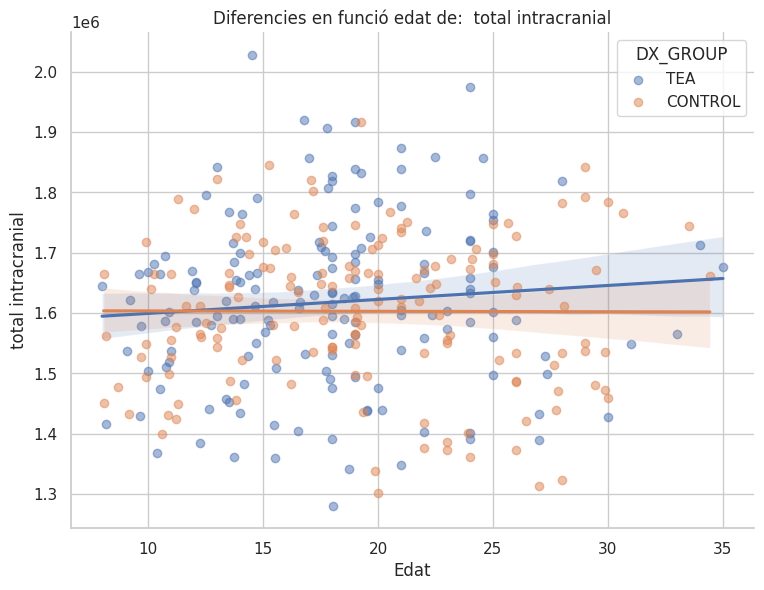

In [26]:
# versió 1 gràfica
plot_age_dependency_bin(vol_ICV_reg.copy(True), 'total intracranial',2)

## Regions Cerebrals

In [27]:
vol_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   left cerebral white matter        316 non-null    float64
 1   left cerebral cortex              316 non-null    float64
 2   left lateral ventricle            316 non-null    float64
 3   left inferior lateral ventricle   316 non-null    float64
 4   left cerebellum white matter      316 non-null    float64
 5   left cerebellum cortex            316 non-null    float64
 6   left thalamus                     316 non-null    float64
 7   left caudate                      316 non-null    float64
 8   left putamen                      316 non-null    float64
 9   left pallidum                     316 non-null    float64
 10  3rd ventricle                     316 non-null    float64
 11  4th ventricle                     316 non-null    float64
 12  brain-st

In [28]:
p1 = vol_reg[['AGE_AT_SCAN']]
p2 = vol_reg[['DX_GROUP']]

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "Intercept", "Coef_x1", "Coef_x2", "Coef_x1:x2",
                                     "p_x1", "p_x2", "p_x1:x2", "R2", "Adj_R2", "F_stat", "F_pval"])
# Similar a model 2 de l'article
for i in list(vol_reg.iloc[:, :32].columns):
    y = vol_reg[[str(i)]]

    # Fit the linear model with an interaction term
    #https://medium.com/@trademamba/stats-models-forumla-api-tutorial-43e44f2f241c
    formula = "y ~ p1 * p2"  # Expands to: y ~ x1…
    model = smf.ols(formula=formula, data=vol_reg).fit()

    # Guardar resultats clau
    results_df = pd.concat([
        results_df,
        pd.DataFrame({
            "Regió": [str(i)],
            "Intercept": [model.params.get("Intercept", None)],
            "Coef_x1": [model.params.get("p1", None)],
            "Coef_x2": [model.params.get("p2", None)],
            "Coef_x1:x2": [model.params.get("p1:p2", None)],
            "p_x1": [model.pvalues.get("p1", None)],
            "p_x2": [model.pvalues.get("p2", None)],
            "p_x1:x2": [model.pvalues.get("p1:p2", None)],
            "R2": [model.rsquared],
            "Adj_R2": [model.rsquared_adj],
            "F_stat": [model.fvalue],
            "F_pval": [model.f_pvalue]
        })
    ], ignore_index=True)
    # Print the model summary
    print("Analysis for Parameter " + str(i))
    print(model.summary())
    plot_age_dependency_bin(vol_reg.copy(True), str(i),2)

display(results_df)

Output hidden; open in https://colab.research.google.com to view.

# Estratificat - Lineal per trams d'edat

In [29]:

df_Strat = vol_reg.copy(True)
df_Strat['total intracranial'] = vol_ICV_reg['total intracranial']
# df dades de subjectes entre 10 i 15 anys
df_Strat_10_15 = df_Strat[df_Strat['AGE_AT_SCAN'].between(10, 15)].copy(deep=True).reset_index(drop=True)
# seleccionar dades de subjectes entre 15 i 20 anys
df_Strat_15_20 = df_Strat[df_Strat['AGE_AT_SCAN'].between(15, 20)].copy(deep=True).reset_index(drop=True)
# seleccionar dades de subjectes entre 20 i 25 anys
df_Strat_20_25 = df_Strat[df_Strat['AGE_AT_SCAN'].between(20, 25)].copy(deep=True).reset_index(drop=True)
# seleccionar dades de subjectes entre 25 i 30 anys
df_Strat_25_30 = df_Strat[df_Strat['AGE_AT_SCAN'].between(25, 30)].copy(deep=True).reset_index(drop=True)
# seleccionar dades de subjectes entre 30 i 35 anys
df_Strat_30_35 = df_Strat[df_Strat['AGE_AT_SCAN'].between(30, 35)].copy(deep=True).reset_index(drop=True)

#
df_Strat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   left cerebral white matter        316 non-null    float64
 1   left cerebral cortex              316 non-null    float64
 2   left lateral ventricle            316 non-null    float64
 3   left inferior lateral ventricle   316 non-null    float64
 4   left cerebellum white matter      316 non-null    float64
 5   left cerebellum cortex            316 non-null    float64
 6   left thalamus                     316 non-null    float64
 7   left caudate                      316 non-null    float64
 8   left putamen                      316 non-null    float64
 9   left pallidum                     316 non-null    float64
 10  3rd ventricle                     316 non-null    float64
 11  4th ventricle                     316 non-null    float64
 12  brain-st

ICV

In [30]:
df_Strat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   left cerebral white matter        316 non-null    float64
 1   left cerebral cortex              316 non-null    float64
 2   left lateral ventricle            316 non-null    float64
 3   left inferior lateral ventricle   316 non-null    float64
 4   left cerebellum white matter      316 non-null    float64
 5   left cerebellum cortex            316 non-null    float64
 6   left thalamus                     316 non-null    float64
 7   left caudate                      316 non-null    float64
 8   left putamen                      316 non-null    float64
 9   left pallidum                     316 non-null    float64
 10  3rd ventricle                     316 non-null    float64
 11  4th ventricle                     316 non-null    float64
 12  brain-st

/tmp/ipython-input-1742922451.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


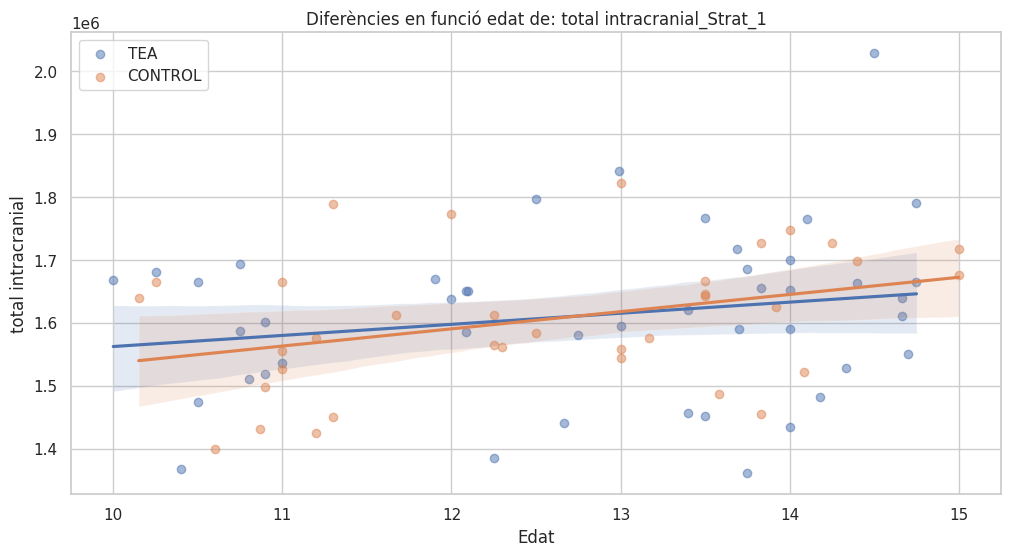

Strat Analysis 2 for total intracranial
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.734
Date:                Wed, 07 Jan 2026   Prob (F-statistic):              0.164
Time:                        10:56:28   Log-Likelihood:                -1463.0
No. Observations:                 111   AIC:                             2934.
Df Residuals:                     107   BIC:                             2945.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

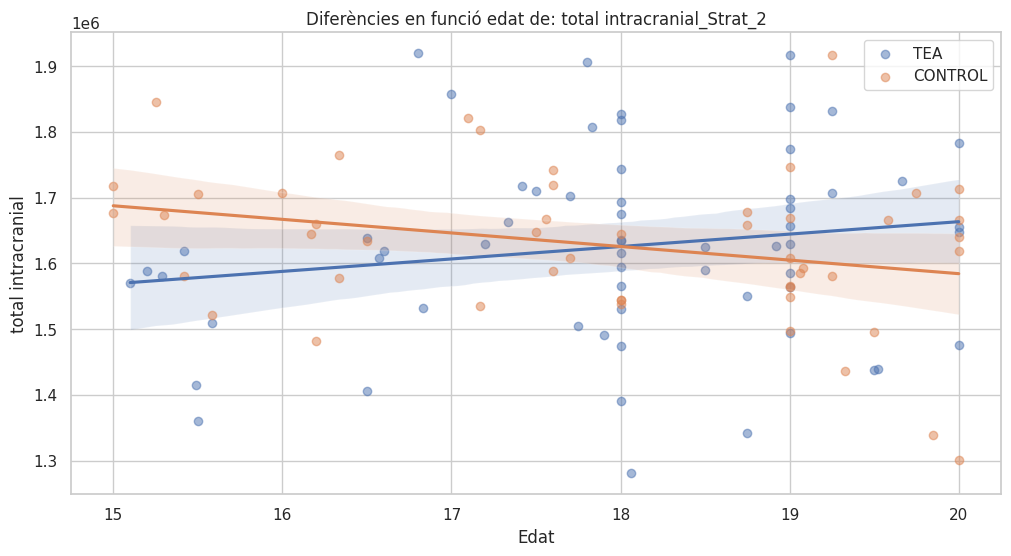

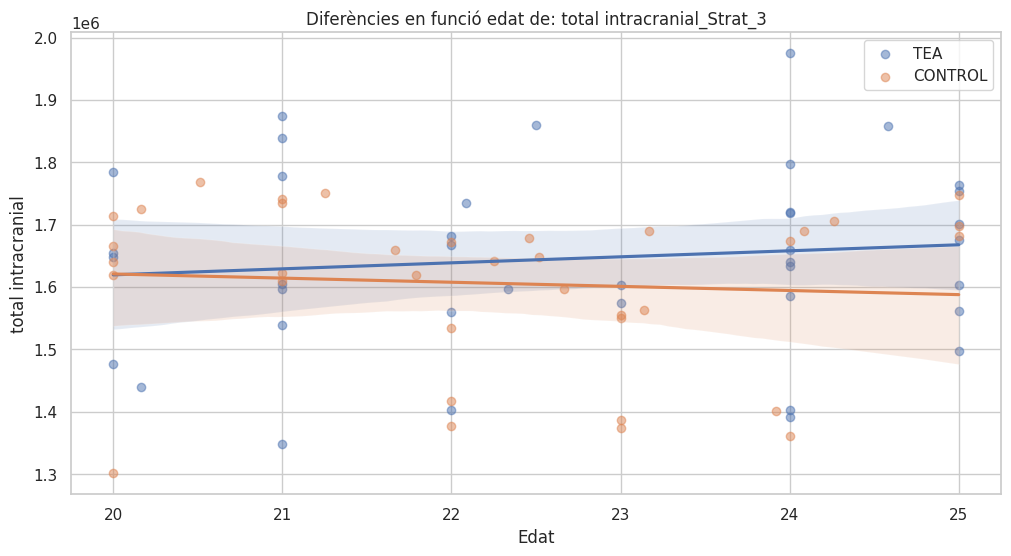

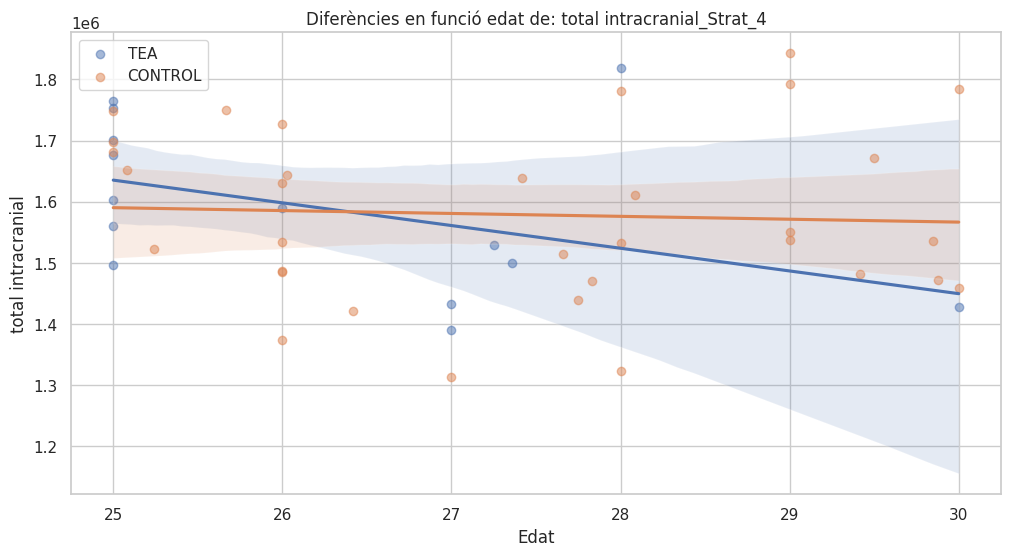

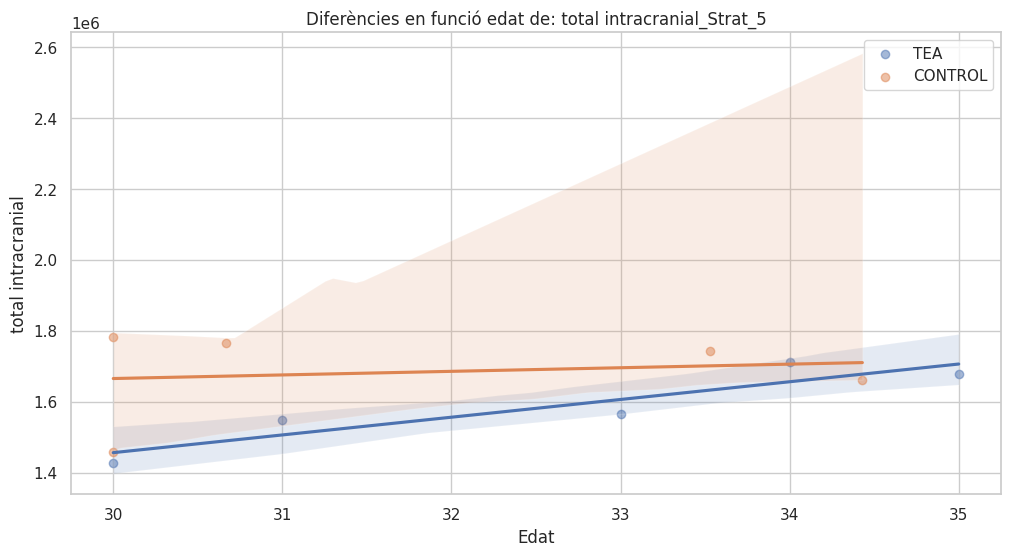

Regió   p_x1:x2        R2    Adj_R2    F_stat    F_pval
0  total intracranial  0.607196  0.071039  0.034369  1.937277  0.130685
1  total intracranial  0.026054  0.046375  0.019637  1.734464  0.164311
2  total intracranial  0.418969  0.031214 -0.009721  0.762532  0.518826
3  total intracranial  0.264246  0.053083 -0.012981  0.803511  0.498816
4  total intracranial  0.341799  0.466506  0.199759  1.748871  0.256352

In [31]:
strat_index = 0
df_Strats = [df_Strat_10_15,df_Strat_15_20,df_Strat_20_25, df_Strat_25_30, df_Strat_30_35]
# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "p_x1:x2", "R2", "Adj_R2", "F_stat", "F_pval"])

for strat in df_Strats:
    strat_index = strat_index + 1
    # Similar a model 2 de l'article
    p1 = strat[['AGE_AT_SCAN']]
    p2 = strat[['DX_GROUP']]
    y = strat[['total intracranial']]

    formula = "y ~ p1 * p2"
    model = smf.ols(formula=formula, data=strat).fit()

    # Guardar resultats clau
    results_df = pd.concat([
        results_df,
        pd.DataFrame({
            "Regió": ['total intracranial'],
            "p_x1:x2": [model.pvalues.get("p1:p2", None)],
            "R2": [model.rsquared],
            "Adj_R2": [model.rsquared_adj],
            "F_stat": [model.fvalue],
            "F_pval": [model.f_pvalue]
        })
    ], ignore_index=True)

    if model.pvalues.get("p1:p2", None) < 0.05:
        # Print the model summary
        print("Strat Analysis "+ str(strat_index) + " for " + 'total intracranial')
        print(model.summary())

    plot_age_dependency_strat(strat.copy(True), 'total intracranial',strat_index)

display(results_df)
#results_df.to_csv(img_strat_path + 'Strat_ICV_OLS_Results.csv', index=False)

Regions cerebrals

In [32]:
strat_index = 0
# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "p_x1:x2", "R2", "Adj_R2", "F_stat", "F_pval"])
df_Strats = [df_Strat_10_15,df_Strat_15_20,df_Strat_20_25, df_Strat_25_30, df_Strat_30_35]

for strat in df_Strats:
    strat_index = strat_index + 1
    # Similar a model 2 de l'article
    for i in list(strat.iloc[:, :31].columns):
        p1 = strat[['AGE_AT_SCAN']]
        p2 = strat[['DX_GROUP']]
        y = strat[[str(i)]]

        formula = "y ~ p1 * p2"
        model = smf.ols(formula=formula, data=strat).fit()

        # Guardar resultats clau
        results_df = pd.concat([
            results_df,
            pd.DataFrame({
                "Regió": [str(i)],
                "p_x1:x2": [model.pvalues.get("p1:p2", None)],
                "R2": [model.rsquared],
                "Adj_R2": [model.rsquared_adj],
                "F_stat": [model.fvalue],
                "F_pval": [model.f_pvalue]
            })
        ], ignore_index=True)

        if model.pvalues.get("p1:p2", None) < 0.05:
            # Print the model summary
            print("Strat Analysis "+ str(strat_index) + " for " + str(i))
            print(model.summary())

        plot_age_dependency_strat(strat.copy(True), str(i),strat_index)

display(results_df)
#results_df.to_csv(img_strat_path + 'Strat_OLS_Results.csv', index=False)

Output hidden; open in https://colab.research.google.com to view.

# Regressió Polinòmica

## Quadràtica amb $edat^2$

In [33]:
from statsmodels.sandbox.predict_functional import predict_functional
# gràfic
def plot_age_dependency_poly_2(df, model, parameter_name, mode):
    """
    Plots the polinomical relationship between age and a specified parameter for both groups.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))

    # visualització
    rang_edats = np.linspace(df['AGE_AT_SCAN'].min(), df['AGE_AT_SCAN'].max(), 100)
    m_rang_edats = rang_edats - df['AGE_AT_SCAN'].mean()

    # prediccions per grup
    preds = []
    for g in df['DX_GROUP'].unique():
        temp = pd.DataFrame({'p1': m_rang_edats,
                             'p2': [g]*len(rang_edats)
                            })
        temp['y_pred'] = model.predict(temp)

        # intervals de confiança (95%)
        pred_res = model.get_prediction(temp)
        ci = pred_res.conf_int(alpha=0.05)   # per defecte 95%
        temp['ci_lower'] = ci[:,0]
        temp['ci_upper'] = ci[:,1]

        preds.append(temp)
    # el model s'ha ajustat amb el valor numèric, canviar-ho una vegada es té la predicció
    df['DX_GROUP'] = df['DX_GROUP'].map({1: "TEA",2:"CONTROL"})

    # gràfic
    for temp in preds:
        temp['p2'] = temp['p2'].map({1: "TEA",2:"CONTROL"})
        plt.plot(rang_edats, temp['y_pred'], label=str(temp['p2'].iloc[0]))
        plt.fill_between(rang_edats, temp['ci_lower'], temp['ci_upper'], alpha=0.2)
    plt.scatter(df['AGE_AT_SCAN'], df[parameter_name], c=df['DX_GROUP'].map({"TEA":"blue","CONTROL":"darkorange"}), alpha=0.5)
    #sns.lmplot(data=df, x='AGE_AT_SCAN', y=parameter_name, hue='DX_GROUP', scatter_kws={'alpha': 0.5},height=6, aspect=1.3, facet_kws={"legend_out": False})

    plt.title('Ajust OLS ' + mode + ' edat amb interacció de grup de:  ' + parameter_name)
    plt.xlabel('Edat')
    plt.ylabel(parameter_name)
    plt.legend()
    plt.grid(True)
    #plt.savefig(img_OLS_path + mode + '_Edat_' + parameter_name  +'.png')
    plt.show()


/tmp/ipython-input-772234769.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


Analysis for Total Intracranial
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.386
Date:                Wed, 07 Jan 2026   Prob (F-statistic):              0.239
Time:                        10:57:50   Log-Likelihood:                -4169.9
No. Observations:                 316   AIC:                             8350.
Df Residuals:                     311   BIC:                             8369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     

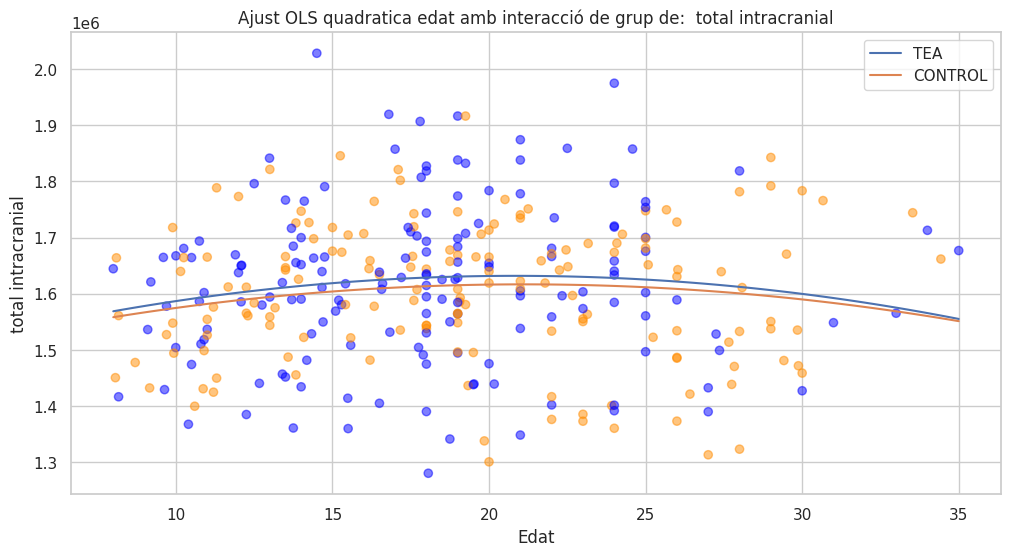

Regió  I(p1 ** 2):p2        R2    Adj_R2    F_stat    F_pval
0  total intracranial       0.903262  0.017518  0.004881  1.386292  0.238508

In [34]:
#ICV
df = vol_ICV_reg.copy(True)
p1 = df['AGE_AT_SCAN'] -  df['AGE_AT_SCAN'].mean()
p2 = df['DX_GROUP']
y = df[['total intracranial']]

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió",  "I(p1 ** 2):p2", "R2", "Adj_R2", "F_stat", "F_pval"])

# Fit the polinomic model with an interaction term
formula = "y ~ p1 + I(p1**2) * p2 "
#model = smf.ols(formula=formula, data=vol_ICV_reg).fit()
model = smf.ols(formula=formula, data=df).fit()

# Guardar resultats clau
results_df = pd.concat([
    results_df,
    pd.DataFrame({
        "Regió": ['total intracranial'],
        "I(p1 ** 2):p2": [model.pvalues.get("I(p1 ** 2):p2", None)],
        "R2": [model.rsquared],
        "Adj_R2": [model.rsquared_adj],
        "F_stat": [model.fvalue],
        "F_pval": [model.f_pvalue]
    })
], ignore_index=True)
# Print the model summary
print("Analysis for Total Intracranial")
print(model.summary())

plot_age_dependency_poly(df.copy(True), model,'total intracranial', 'quadratica')

display(results_df)
#results_df.to_csv(img_poly_path + 'OLS_ICV_Results_quadratica.csv', index=False)


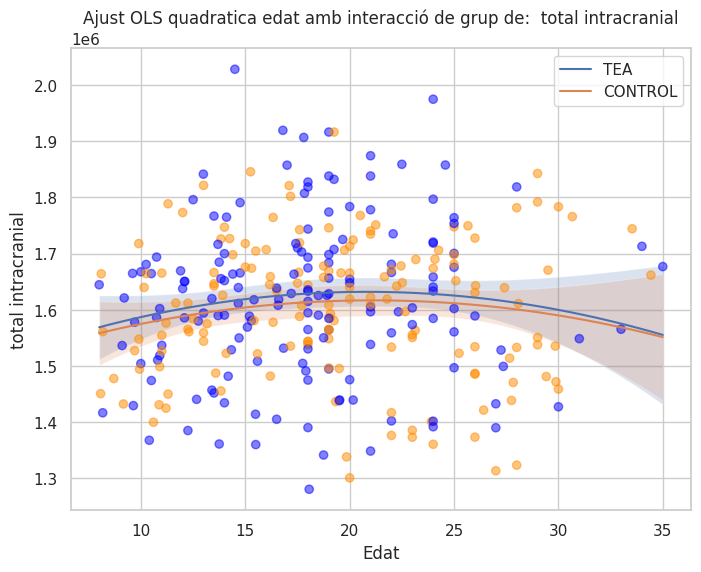

In [35]:
plot_age_dependency_poly_2(df.copy(True), model,'total intracranial', 'quadratica')

In [36]:
# centrar edat per reduir efectes de colinealitat entre edats (edat i eadt^2)
# beta0 passa a representar el valors esperat de y a la mitjana d'esdat
# la interacció indica com la pendent varia l voltant de l'edat mitjana
p1 = vol_reg[['AGE_AT_SCAN']] - vol_reg[['AGE_AT_SCAN']].mean()
p2 = vol_reg[['DX_GROUP']]

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió",  "I(p1 ** 2):p2", "R2", "Adj_R2", "F_stat", "F_pval"])
# Similar a model 2 de l'article
for i in list(vol_reg.iloc[:, :32].columns):
    y = vol_reg[[str(i)]]

    # Fit the polinomic model with an interaction term
    formula = "y ~ p1 + I(p1**2) * p2 "
    model = smf.ols(formula=formula, data=vol_reg).fit()

    # Guardar resultats clau
    results_df = pd.concat([
        results_df,
        pd.DataFrame({
            "Regió": [str(i)],
            "I(p1 ** 2):p2": [model.pvalues.get("I(p1 ** 2):p2", None)],
            "R2": [model.rsquared],
            "Adj_R2": [model.rsquared_adj],
            "F_stat": [model.fvalue],
            "F_pval": [model.f_pvalue]
        })
    ], ignore_index=True)
    # Print the model summary
    print("Analysis for Parameter " + str(i))
    print(model.summary())

    plot_age_dependency_poly_2(vol_reg.copy(True), model, str(i), 'quadratica')
display(results_df)
#results_df.to_csv(img_OLS_path + 'OLS_Results_quadratica.csv', index=False)


Output hidden; open in https://colab.research.google.com to view.

## Cúbica amb $edat^3$

/tmp/ipython-input-3990543518.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


Analysis for Total Intracranial 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6419
Date:                Wed, 07 Jan 2026   Prob (F-statistic):              0.633
Time:                        10:58:00   Log-Likelihood:                -4171.4
No. Observations:                 316   AIC:                             8353.
Df Residuals:                     311   BIC:                             8372.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept    

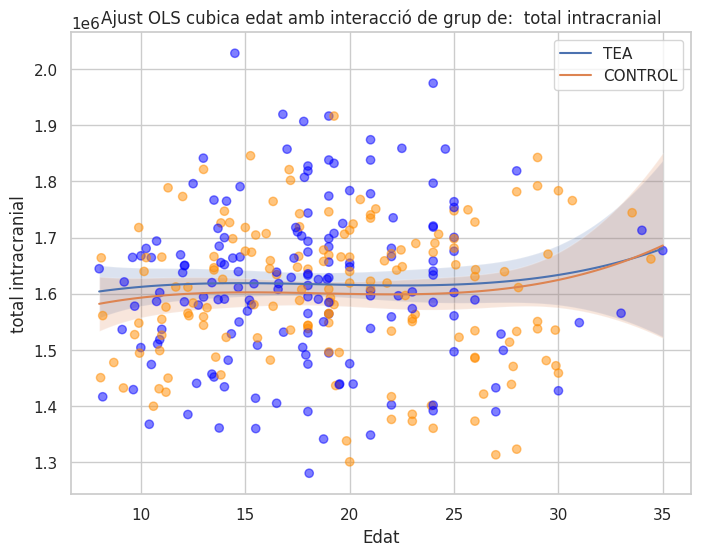

Regió  I(p1 ** 3):p2        R2    Adj_R2   F_stat    F_pval
0  total intracranial       0.838502  0.008188 -0.004568  0.64189  0.632996

In [37]:
#ICV
p1 = vol_ICV_reg[['AGE_AT_SCAN']] -  vol_ICV_reg[['AGE_AT_SCAN']].mean()
p2 = vol_ICV_reg[['DX_GROUP']]
y = vol_ICV_reg[['total intracranial']]

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "I(p1 ** 3):p2", "R2", "Adj_R2", "F_stat", "F_pval"])

# Fit the polinomic model with an interaction term
formula = "y ~ p1 + I(p1**3)*p2 "
model = smf.ols(formula=formula, data=vol_ICV_reg).fit()

# Guardar resultats clau
results_df = pd.concat([
    results_df,
    pd.DataFrame({
            "Regió": ['total intracranial'],
            "I(p1 ** 3):p2": [model.pvalues.get("I(p1 ** 3):p2", None)],
            "R2": [model.rsquared],
            "Adj_R2": [model.rsquared_adj],
            "F_stat": [model.fvalue],
            "F_pval": [model.f_pvalue]
     })
], ignore_index=True)
# Print the model summary
print("Analysis for Total Intracranial ")
print(model.summary())

plot_age_dependency_poly_2(vol_ICV_reg.copy(True), model,'total intracranial', 'cubica')
display(results_df)
#results_df.to_csv(img_OLS_path + 'OLS_ICV_Results_cubica', index=False)


In [38]:
# centrar edat per reduir efectes de colinealitat entre edats (edat i eadt^2)
# beta0 passa a representar el valors esperat de y a la mitjana d'esdat
# la interacció indica com la pendent varia l voltant de l'edat mitjana
p1 = vol_reg[['AGE_AT_SCAN']] - vol_reg[['AGE_AT_SCAN']].mean()
p2 = vol_reg[['DX_GROUP']]

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "I(p1 ** 3):p2", "R2", "Adj_R2", "F_stat", "F_pval"])
# Similar a model 2 de l'article
for i in list(vol_reg.iloc[:, :32].columns):
    y = vol_reg[[str(i)]]

    # Fit the polinomic model with an interaction term
    formula = "y ~ p1 + I(p1**3)*p2 "
    model = smf.ols(formula=formula, data=vol_reg).fit()

    # Guardar resultats clau
    results_df = pd.concat([
        results_df,
        pd.DataFrame({
            "Regió": [str(i)],
            "I(p1 ** 3):p2": [model.pvalues.get("I(p1 ** 3):p2", None)],
            "R2": [model.rsquared],
            "Adj_R2": [model.rsquared_adj],
            "F_stat": [model.fvalue],
            "F_pval": [model.f_pvalue]
        })
    ], ignore_index=True)
    # Print the model summary
    print("Analysis for Parameter " + str(i))
    print(model.summary())

    # debug
    parameter_name = str(i)
    df = vol_reg.copy(True)

    plot_age_dependency_poly_2(vol_reg.copy(True), model, str(i), 'cubica')
display(results_df)
#results_df.to_csv(img_OLS_path + 'OLS_Results_cubica.csv', index=False)

Output hidden; open in https://colab.research.google.com to view.

# Splines

In [39]:
vol_splines_ICV = vol_ICV_reg.copy(True)
# Convert DX_GROUP and SEX to categorical data type
vol_splines_ICV['DX_GROUP'] = vol_splines_ICV['DX_GROUP'].astype('category')
vol_splines_ICV['SEX'] = vol['SEX'].astype('category')
vol_splines_ICV.head()

total intracranial  left cerebral white matter  \
0        1.596565e+06                   14.828884   
1        1.475760e+06                   14.385238   
2        1.475055e+06                   13.444473   
3        1.838163e+06                   14.898534   
4        1.838187e+06                   14.217039   

   right cerebral white matter DX_GROUP  AGE_AT_SCAN SEX    FIQ  
0                    14.785216        1         21.0   1   94.0  
1                    14.403042        1         20.0   1   97.0  
2                    13.514513        1         18.0   1  111.0  
3                    14.945644        1         21.0   1   97.0  
4                    14.375942        1         19.0   1  139.0

In [40]:
vol_splines = vol_reg.copy(True)
vol_splines['SEX'] = vol['SEX']
# Convert DX_GROUP and SEX to categorical data type
vol_splines['DX_GROUP'] = vol_splines['DX_GROUP'].astype('category')
vol_splines['SEX'] = vol_splines['SEX'].astype('category')
vol_splines.head()

left cerebral white matter  left cerebral cortex  left lateral ventricle  \
0                    0.148201              0.172916                0.004299   
1                    0.143959              0.177085                0.004137   
2                    0.135129              0.166210                0.005572   
3                    0.149008              0.166349                0.006931   
4                    0.142604              0.162814                0.009000   

   left inferior lateral ventricle  left cerebellum white matter  \
0                         0.000391                      0.008866   
1                         0.000384                      0.009878   
2                         0.000428                      0.011263   
3                         0.000424                      0.012182   
4                         0.000391                      0.010841   

   left cerebellum cortex  left thalamus  left caudate  left putamen  \
0                0.029530       0.004925      0.003081      0.004373   
1                0.034666       0.005442      0.002604      0.004202   
2                0.037202       0.004642      0.003030      0.003988   
3                0.037870       0.005128      0.002787      0.003658   
4                0.032813       0.004516      0.002994      0.003793   

   left pallidum  ...  right putamen  right pallidum  right hippocampus  \
0       0.001130  ...       0.004221        0.001097           0.002594   
1       0.001085  ...       0.004102        0.001068           0.003006   
2       0.001141  ...       0.003839        0.001192           0.002713   
3       0.001025  ...       0.003623        0.001085           0.002787   
4       0.001075  ...       0.003918        0.001046           0.003066   

   right amygdala  right accumbens area  right ventral DC  DX_GROUP  \
0        0.001163              0.000535          0.002639         1   
1        0.001243              0.000511          0.002759         1   
2        0.001262              0.000484          0.002822         1   
3        0.001200              0.000442          0.002929         1   
4        0.001127              0.000441          0.002720         1   

   AGE_AT_SCAN  SEX    FIQ  
0         21.0    1   94.0  
1         20.0    1   97.0  
2         18.0    1  111.0  
3         21.0    1   97.0  
4         19.0    1  139.0  

[5 rows x 36 columns]

In [41]:
from patsy import dmatrices, build_design_matrices

def plot_spline (model_target,X_target,target_region, df, knots):
    """
    Plots the spline relationship between age and a specified parameter for both groups and sex.
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # Crear rang d’edats
    # Use actual min/max of AGE_AT_SCAN from the data for more accurate prediction range
    age_range = np.linspace(df['AGE_AT_SCAN'].min(), df['AGE_AT_SCAN'].max(), 50)

    # Get all categories from the original df_for_model's SEX and DX_GROUP columns
    original_dx_group_categories = df['DX_GROUP'].cat.categories
    original_sex_categories = df['SEX'].cat.categories

    # Define label maps for plotting, assuming 1.0 and 2.0 are the category values
    dx_group_num_to_label = {1.0: "TEA", 2.0: "CONTROL"}
    sex_num_to_label = {1.0: "Home", 2.0: "Dona"}

    # Prediccions per cada combinació
    preds = {}
    for g_val in df["DX_GROUP"].unique():
        for s_val in df["SEX"].unique():
            # Create a temporary DataFrame for prediction with the correct column names for patsy
            # Explicitly set the categories for DX_GROUP and SEX to match the original model's categories
            new_df_data = pd.DataFrame({
                'AGE_AT_SCAN': age_range,
                'DX_GROUP': pd.Categorical([g_val]*len(age_range), categories=original_dx_group_categories),
                'SEX': pd.Categorical([s_val]*len(age_range), categories=original_sex_categories)
            })

            # Build the design matrix for prediction using the original model's design_info
            new_exog = build_design_matrices([X_target.design_info], new_df_data, return_type='dataframe')[0]

            # Get predictions
            pred = model_target.get_prediction(new_exog)
            summary_frame  = pred.summary_frame(alpha=0.05)  # 95% CI
            preds[(g_val, s_val)] = summary_frame

    # Plot
    plt.figure(figsize=(12, 6))

    for (g_val, s_val), sf in preds.items():
        # Use string values from maps for DX_GROUP and SEX labels
        g_label = dx_group_num_to_label[g_val]
        s_label = sex_num_to_label[s_val]

        linestyle = "-" if s_val == 1.0 else "--" # Compare with float 1.0 for 'Home' o 2.0 per 'dona'
        color = "blue" if g_val == 1.0 else "red" # TEA is 1.0 (blue), CONTROL is 2.0 (red)
        label = f"{g_label}-{s_label}"
        plt.plot(age_range, sf["mean"], linestyle=linestyle, color=color, label=label)
        plt.fill_between(age_range, sf["mean_ci_lower"], sf["mean_ci_upper"],
                        color=color, alpha=0.2)

    # mostrar només "punts"
    sns.regplot(data=df[df['DX_GROUP'] == 1.0], x='AGE_AT_SCAN', y=target_region, label='TEA', color = "blue", scatter_kws={'alpha': 0.3}, fit_reg=False)
    sns.regplot(data=df[df['DX_GROUP'] == 2.0], x='AGE_AT_SCAN', y=target_region, label='CONTROL', color = "red", scatter_kws={'alpha': 0.3}, fit_reg=False)

    plt.xlabel("Edat")
    plt.ylabel(f"Volum {target_region} normalitzat")
    plt.legend()
    plt.title(f"Spline OLS: volum {target_region} vs edat per grup i sexe")
    #plt.savefig(img_OLS_path + knots + 'Spline ' + target_region +'.png')
    plt.show()

ICV

In [42]:
vol_splines_ICV.head()

total intracranial  left cerebral white matter  \
0        1.596565e+06                   14.828884   
1        1.475760e+06                   14.385238   
2        1.475055e+06                   13.444473   
3        1.838163e+06                   14.898534   
4        1.838187e+06                   14.217039   

   right cerebral white matter DX_GROUP  AGE_AT_SCAN SEX    FIQ  
0                    14.785216        1         21.0   1   94.0  
1                    14.403042        1         20.0   1   97.0  
2                    13.514513        1         18.0   1  111.0  
3                    14.945644        1         21.0   1   97.0  
4                    14.375942        1         19.0   1  139.0

Resultats total intracranial
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     5.344
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           1.57e-09
Time:                        10:58:10   Log-Likelihood:                -4135.3
No. Observations:                 316   AIC:                             8303.
Df Residuals:                     300   BIC:                             8363.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/tmp/ipython-input-3238123471.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([


Regió  Interaccio_knot0  Interaccio_knot1  Interaccio_knot2  \
0  total intracranial          0.932149          0.921224           0.85523   

   Interaccio_knot3  Interaccio_knot4  Interaccio_knot5        R2    Adj_R2  \
0          0.182464          0.104943          0.744295  0.210858  0.171401   

     F_stat        F_pval  
0  5.343991  1.566981e-09

<Figure size 1500x10000 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

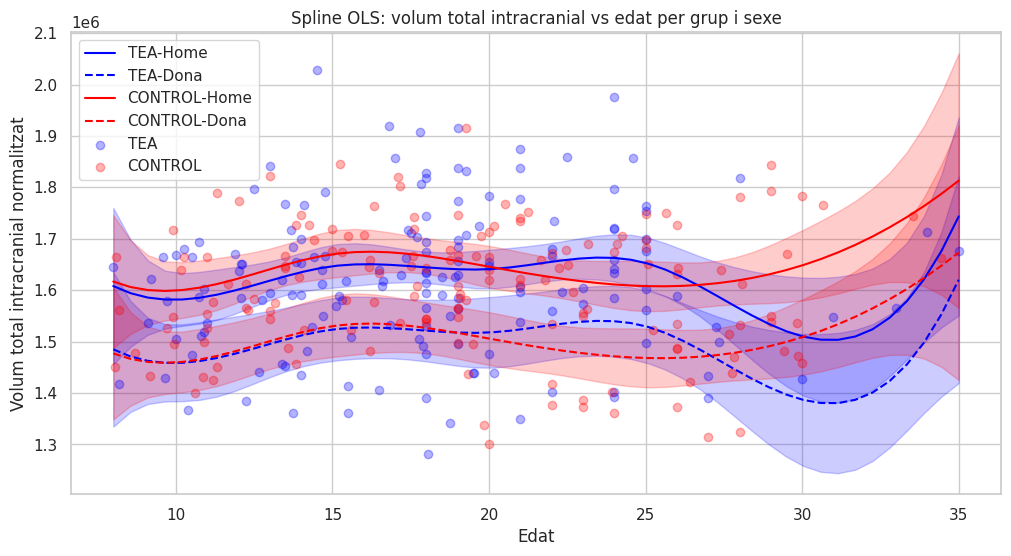

In [43]:
from patsy import dmatrices, dmatrix, build_design_matrices

plt.figure(figsize = (15,100))
sns.set_style("whitegrid")

# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "Interaccio_knot0", "Interaccio_knot1", "Interaccio_knot2", "Interaccio_knot3", "Interaccio_knot4",
                                   "Interaccio_knot5","R2", "Adj_R2", "F_stat", "F_pval"])

y = vol_splines_ICV['total intracranial']
# Construir la matriu de disseny amb splines + interaccions
formula = "y ~ bs(AGE_AT_SCAN, knots=(15,20,25), degree=3)* C(DX_GROUP) + C(DX_GROUP) * SEX"
y, X = dmatrices(formula, vol_splines_ICV, return_type='dataframe')
# Ajustar el model OLS
model = sm.OLS(y, X).fit()

# Guardar resultats clau
results_df = pd.concat([
    results_df,
    pd.DataFrame({
            "Regió": ['total intracranial'],
            "Interaccio_knot0": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[0]:C(DX_GROUP)[T.2]", None)],
            "Interaccio_knot1": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[1]:C(DX_GROUP)[T.2]", None)],
            "Interaccio_knot2": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[2]:C(DX_GROUP)[T.2]", None)],
            "Interaccio_knot3": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[3]:C(DX_GROUP)[T.2]", None)],
            "Interaccio_knot4": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[4]:C(DX_GROUP)[T.2]", None)],
            "Interaccio_knot5": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[5]:C(DX_GROUP)[T.2]", None)],
            "R2": [model.rsquared],
            "Adj_R2": [model.rsquared_adj],
            "F_stat": [model.fvalue],
            "F_pval": [model.f_pvalue]
    })
], ignore_index=True)

# Print the model summary
print("Resultats total intracranial")
print(model.summary())

display(results_df)
plot_spline(model, X, 'total intracranial',vol_splines_ICV,"K3")

Resta Regions

In [44]:
# comprobar a partir de quin index cal guardar
model.pvalues[10:]

bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[0]:C(DX_GROUP)[T.2]    0.932149
bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[1]:C(DX_GROUP)[T.2]    0.921224
bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[2]:C(DX_GROUP)[T.2]    0.855230
bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[3]:C(DX_GROUP)[T.2]    0.182464
bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[4]:C(DX_GROUP)[T.2]    0.104943
bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[5]:C(DX_GROUP)[T.2]    0.744295
dtype: float64

In [45]:
from patsy import dmatrices, dmatrix, build_design_matrices

plt.figure(figsize = (15,100))
sns.set_style("whitegrid")

j = 0
# DataFrame buit per guardar resultats
results_df = pd.DataFrame(columns=["Regió", "Interaccio_knot0", "Interaccio_knot1", "Interaccio_knot2", "Interaccio_knot3", "Interaccio_knot4",
                                   "Interaccio_knot5","R2", "Adj_R2", "F_stat", "F_pval"])
for i in list(vol_splines.iloc[:, :32].columns):
    y = vol_splines[[str(i)]]
    formula = "y ~ bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)* C(DX_GROUP) + C(DX_GROUP) * SEX"
    y, X = dmatrices(formula, vol_splines, return_type='dataframe')
    # Ajustar el model OLS
    model = sm.OLS(y, X).fit()

    # només plotejar els que tinguin alguna interacció significativa
    ps = model.pvalues[10:]
    pSignificativa = any (p < 0.05 for p in ps)
    #if pSignificativa:
        #print("Resultats " + str(i))
        #print(model.summary())
    plot_spline(model, X, str(i),vol_splines,'K3')

    # Guardar resultats clau
    results_df = pd.concat([
        results_df,
        pd.DataFrame({
                "Regió": [str(i)],
                "Interaccio_knot0": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[0]:C(DX_GROUP)[T.2]", None)],
                "Interaccio_knot1": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[1]:C(DX_GROUP)[T.2]", None)],
                "Interaccio_knot2": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[2]:C(DX_GROUP)[T.2]", None)],
                "Interaccio_knot3": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[3]:C(DX_GROUP)[T.2]", None)],
                "Interaccio_knot4": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[4]:C(DX_GROUP)[T.2]", None)],
                "Interaccio_knot5": [model.pvalues.get("bs(AGE_AT_SCAN, knots=(15, 20, 25), degree=3)[5]:C(DX_GROUP)[T.2]", None)],
                "R2": [model.rsquared],
                "Adj_R2": [model.rsquared_adj],
                "F_stat": [model.fvalue],
                "F_pval": [model.f_pvalue]
        })
    ], ignore_index=True)

display(results_df)
#results_df.to_csv(img_OLS_path + 'OLS_Splines.csv', index=False)

Output hidden; open in https://colab.research.google.com to view.